<a href="https://colab.research.google.com/github/teoad95/Infusing-business-optimization-processes-with-machine-learning-and-expert-knowledge./blob/main/Main_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression experiments

## Experiments with dataset with statistical values for the whole jumbo

Dataset describes the orders of each run using statistical values like:

1.   Number of orders
2.   Number of Distinct widths (orders)
3.   Maximum width of run
4.   Minimum width of run
5.   Average width of orders
6.   Number of reels requested from each order (Average bettween the actual and the upper/over tolerances)
7.   Total waste percentage of solution



###Data visualization and preprocessing


Import pre-required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

sns.set_style('darkgrid')
cmap = sns.cm.mako_r
%matplotlib inline

In [2]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

Load dataset

In [3]:
dataset_url = 'https://raw.githubusercontent.com/teoad95/Infusing-business-optimization-processes-with-machine-learning-and-expert-knowledge./main/Datasets/StatisticalOnFullJumboDataset.csv'

In [4]:
runs = pd.read_csv(dataset_url, sep=';')

Describe data

In [5]:
runs.head()

RUNNUMBER  MaxWidth  ...  WeightedAverageWidth  TOTALWASTEPERCENT
0          1      6100  ...           2841.885883           0.628959
1          2      5800  ...           3267.406710           4.398778
2          3      6100  ...           3635.490177           7.828784
3          4      6100  ...           3634.856429           3.385417
4          5      6100  ...           2654.450214           1.081588

[5 rows x 9 columns]

In [6]:
runs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   RUNNUMBER             564 non-null    int64  
 1   MaxWidth              564 non-null    int64  
 2   MinWidth              564 non-null    int64  
 3   NumberOfOrders        564 non-null    int64  
 4   AverageWidth          564 non-null    float64
 5   Deviation             564 non-null    float64
 6   AVGNUMBEROFREELS      564 non-null    float64
 7   WeightedAverageWidth  564 non-null    float64
 8   TOTALWASTEPERCENT     564 non-null    float64
dtypes: float64(5), int64(4)
memory usage: 39.8 KB


In [7]:
runs.drop(columns=['RUNNUMBER']).describe()

MaxWidth     MinWidth  ...  WeightedAverageWidth  TOTALWASTEPERCENT
count   564.000000   564.000000  ...            564.000000         564.000000
mean   5974.290780   760.948582  ...           3259.408232           2.491932
std     224.507419   272.497552  ...            318.968462           2.100439
min    4000.000000   400.000000  ...           2157.415624           0.032345
25%    6000.000000   600.000000  ...           3064.836977           1.211506
50%    6100.000000   600.000000  ...           3273.901584           1.883947
75%    6100.000000   800.000000  ...           3469.480477           3.172152
max    6100.000000  1900.000000  ...           4443.279295          20.675751

[8 rows x 8 columns]

In [8]:
runs = runs.fillna(0)

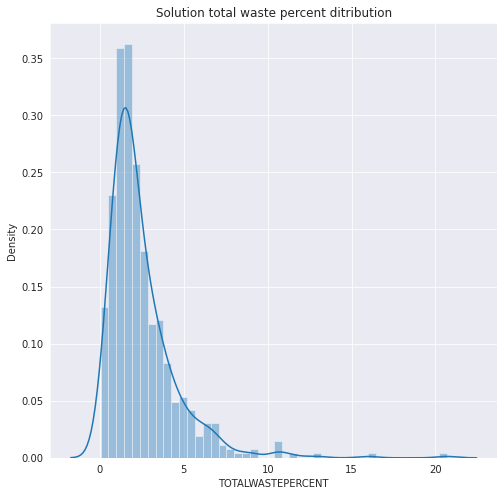

In [9]:
plt.figure(figsize=(8,8))

plt.title('Solution total waste percent ditribution')
sns.distplot(runs['TOTALWASTEPERCENT'])

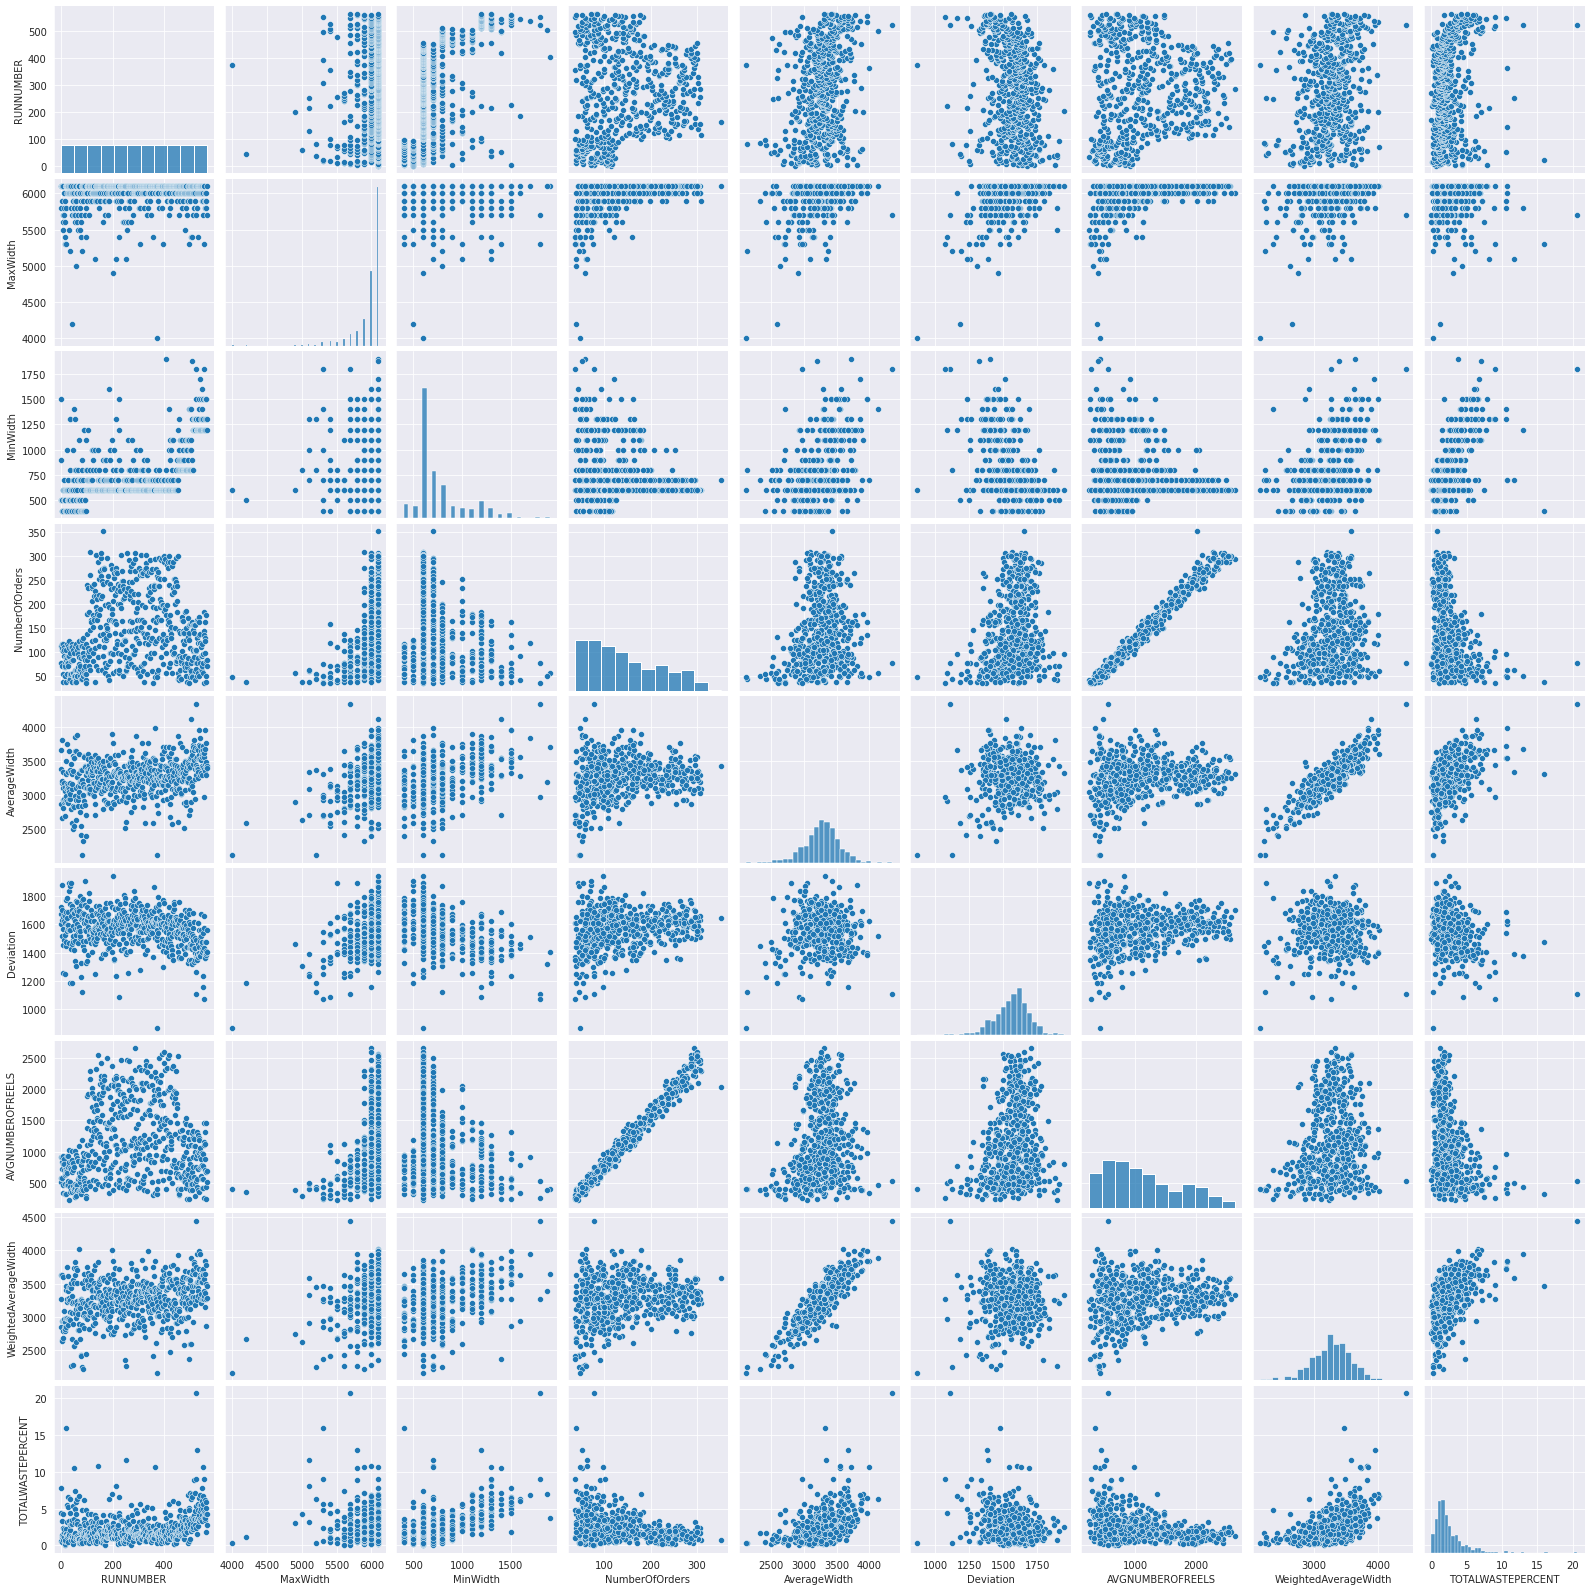

In [10]:
ax = sns.pairplot(runs[runs.columns])

In [11]:
def plot_corr_matrix(datast):
    corrMatrix = datast.corr()
    plt.figure(figsize=(35,15))
    sns.heatmap(corrMatrix, annot=True)
    plt.show()
    

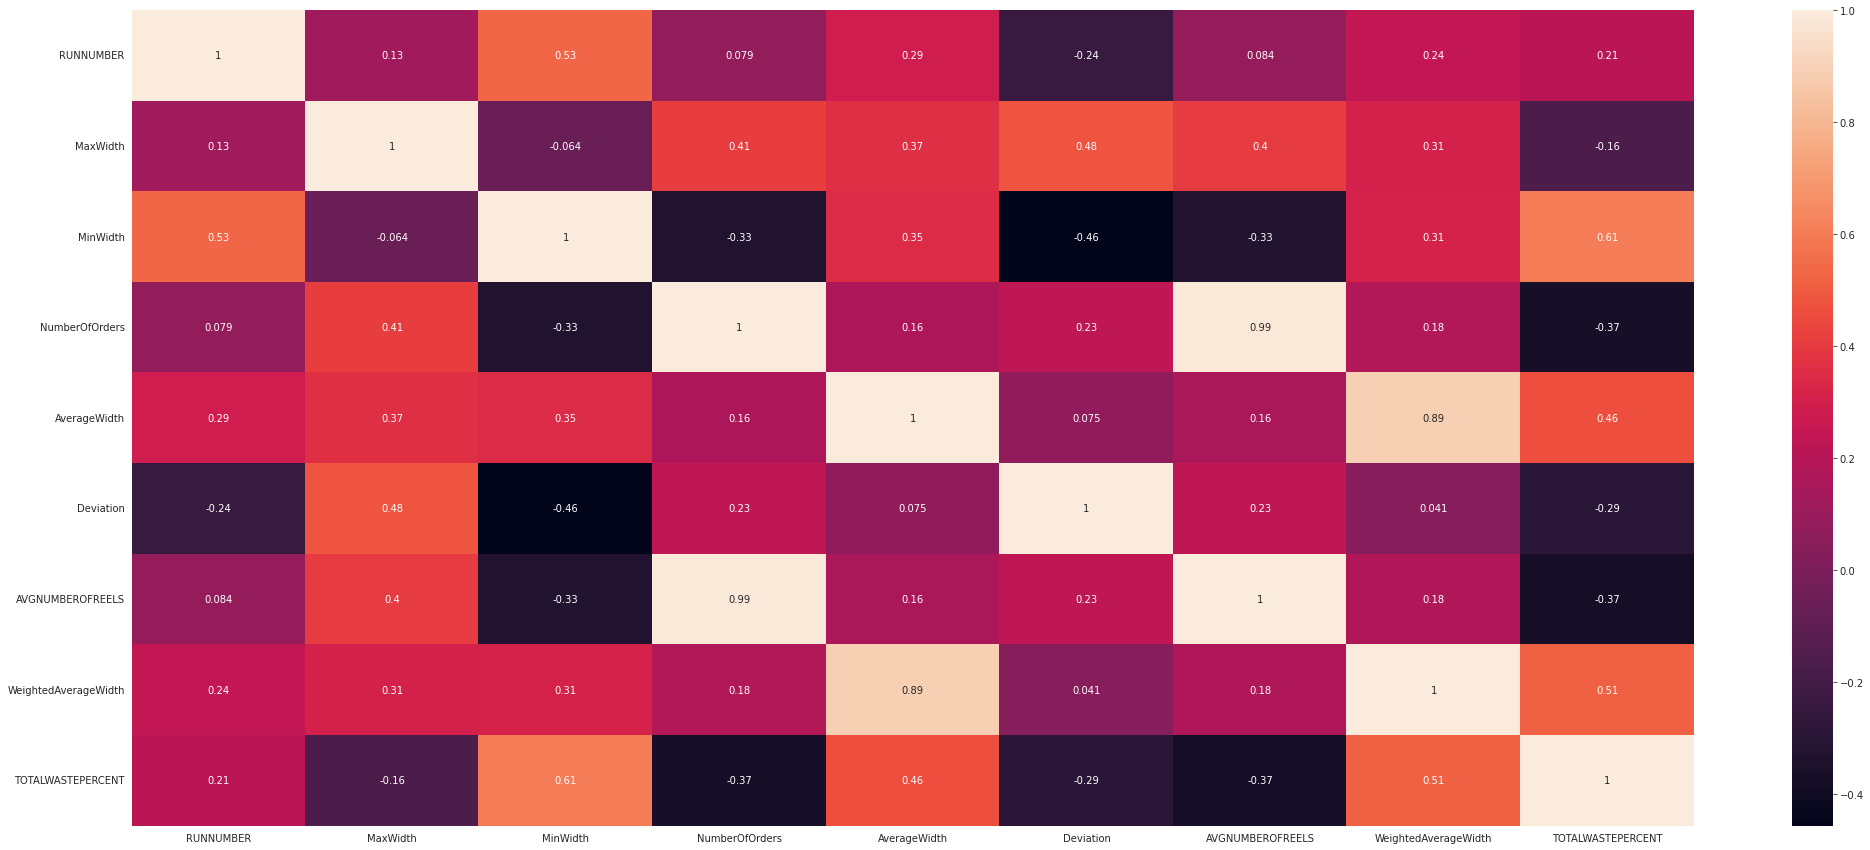

In [12]:
plot_corr_matrix(runs)

We see that average number of reels is highly correlated with number of orders.

### Regression experiments

In [13]:
# Splitting into features and value to be predicted
X = runs.drop(columns=['RUNNUMBER', 'TOTALWASTEPERCENT', 'NumberOfOrders'])
y = runs['TOTALWASTEPERCENT']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

In [15]:
from sklearn import metrics
def regression_model_metrics(y_test, y_pred):
  return metrics.mean_absolute_error(y_test, y_pred), metrics.mean_squared_error(y_test, y_pred), np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [16]:
def get_model_prediction_time(model, x_to_test):
  start = datetime.now()
  prd = model.predict(x_to_test)
  end = datetime.now()
  time_difference = (end-start).total_seconds()
  return time_difference/len(x_to_test)

In [17]:
def test_regression_model(model, l_x_train, l_x_test, l_y_train, l_y_test):
  model.fit(l_x_train, l_y_train)
  prediction_time = get_model_prediction_time(model, l_x_test)
  mean_absolute_error, mean_squared_error, root_mean_square_error = regression_model_metrics(l_y_test, model.predict(l_x_test))
  return mean_absolute_error, mean_squared_error, root_mean_square_error, prediction_time

In [18]:
from sklearn.linear_model import LinearRegression, SGDRegressor, ElasticNet, BayesianRidge, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRFRegressor
from sklearn.preprocessing import PolynomialFeatures

def test_regression_models(l_x_train, l_x_test, l_y_train, l_y_test):
  names_list = []
  mean_absolute_error_list = []
  mean_square_error_list = []
  root_mean_square_error_list = []
  prediction_time_list = []

  mean_absolute_error, mean_squared_error, root_mean_square_error, pred_time = test_regression_model(LinearRegression(), X_train, X_test, y_train, y_test)
  names_list.append('Linear regression')
  mean_absolute_error_list.append(mean_absolute_error)
  mean_square_error_list.append(mean_squared_error)
  root_mean_square_error_list.append(root_mean_square_error)
  prediction_time_list.append(pred_time)


  mean_absolute_error, mean_squared_error, root_mean_square_error, pred_time = test_regression_model(SGDRegressor(), X_train, X_test, y_train, y_test)
  names_list.append('SGD regressor')
  mean_absolute_error_list.append(mean_absolute_error)
  mean_square_error_list.append(mean_squared_error)
  root_mean_square_error_list.append(root_mean_square_error)
  prediction_time_list.append(pred_time)
  
  mean_absolute_error, mean_squared_error, root_mean_square_error, pred_time = test_regression_model(ElasticNet(), X_train, X_test, y_train, y_test)
  names_list.append('ElasticNet')
  mean_absolute_error_list.append(mean_absolute_error)
  mean_square_error_list.append(mean_squared_error)
  root_mean_square_error_list.append(root_mean_square_error)
  prediction_time_list.append(pred_time)

  mean_absolute_error, mean_squared_error, root_mean_square_error, pred_time = test_regression_model(BayesianRidge(), X_train, X_test, y_train, y_test)
  names_list.append('BayesianRidge')
  mean_absolute_error_list.append(mean_absolute_error)
  mean_square_error_list.append(mean_squared_error)
  root_mean_square_error_list.append(root_mean_square_error)
  prediction_time_list.append(pred_time)

  mean_absolute_error, mean_squared_error, root_mean_square_error, pred_time = test_regression_model(RandomForestRegressor(), X_train, X_test, y_train, y_test)
  names_list.append('RandomForestRegressor')
  mean_absolute_error_list.append(mean_absolute_error)
  mean_square_error_list.append(mean_squared_error)
  root_mean_square_error_list.append(root_mean_square_error)
  prediction_time_list.append(pred_time)

  mean_absolute_error, mean_squared_error, root_mean_square_error, pred_time = test_regression_model(DecisionTreeRegressor(), X_train, X_test, y_train, y_test)
  names_list.append('DecisionTreeRegressor')
  mean_absolute_error_list.append(mean_absolute_error)
  mean_square_error_list.append(mean_squared_error)
  root_mean_square_error_list.append(root_mean_square_error)
  prediction_time_list.append(pred_time)

  mean_absolute_error, mean_squared_error, root_mean_square_error, pred_time = test_regression_model(XGBRFRegressor(), X_train, X_test, y_train, y_test)
  names_list.append('XGBRFRegressor')
  mean_absolute_error_list.append(mean_absolute_error)
  mean_square_error_list.append(mean_squared_error)
  root_mean_square_error_list.append(root_mean_square_error)
  prediction_time_list.append(pred_time)

  poly_reg = PolynomialFeatures(degree=2)
  mean_absolute_error, mean_squared_error, root_mean_square_error, pred_time = test_regression_model(LinearRegression(), poly_reg.fit_transform(X_train), poly_reg.transform(X_test), y_train, y_test)
  names_list.append('Polynomial regression 2nd degree')
  mean_absolute_error_list.append(mean_absolute_error)
  mean_square_error_list.append(mean_squared_error)
  root_mean_square_error_list.append(root_mean_square_error)
  prediction_time_list.append(pred_time)
  
  poly_reg = PolynomialFeatures(degree=3)
  mean_absolute_error, mean_squared_error, root_mean_square_error, pred_time = test_regression_model(LinearRegression(), poly_reg.fit_transform(X_train), poly_reg.transform(X_test), y_train, y_test)
  names_list.append('Polynomial regression 3nd degree')
  mean_absolute_error_list.append(mean_absolute_error)
  mean_square_error_list.append(mean_squared_error)
  root_mean_square_error_list.append(root_mean_square_error)
  prediction_time_list.append(pred_time)

  # initialize data of lists.
  data = {'Model name':names_list,
          'Mean absolute error':mean_absolute_error_list,
          'Mean square error':mean_square_error_list,
          'Root mean square error':root_mean_square_error_list,
          'Prediction time (s)': prediction_time_list
          }
  return pd.DataFrame.from_dict(data).sort_values(by=['Mean absolute error'])


In [19]:
results = test_regression_models(X_train, X_test, y_train, y_test)

[09:02:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [20]:
results

Model name  ...  Prediction time (s)
7  Polynomial regression 2nd degree  ...             0.000002
4             RandomForestRegressor  ...             0.000138
0                 Linear regression  ...             0.000036
2                        ElasticNet  ...             0.000017
3                     BayesianRidge  ...             0.000016
6                    XGBRFRegressor  ...             0.000014
8  Polynomial regression 3nd degree  ...             0.000004
5             DecisionTreeRegressor  ...             0.000018
1                     SGD regressor  ...             0.000016

[9 rows x 5 columns]

In [21]:
from sklearn.preprocessing import StandardScaler
def Standarize_data(l_x_train, l_x_test):
  scalify = StandardScaler()
  return scalify.fit_transform(X_train), scalify.fit_transform(X_test)

In [22]:
standarize_x_train, standarize_x_test = Standarize_data(X_train, X_test)

In [23]:
results = test_regression_models(standarize_x_train, standarize_x_test, y_train, y_test)

[09:02:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [24]:
results

Model name  ...  Prediction time (s)
7  Polynomial regression 2nd degree  ...             0.000002
4             RandomForestRegressor  ...             0.000135
0                 Linear regression  ...             0.000022
2                        ElasticNet  ...             0.000017
3                     BayesianRidge  ...             0.000017
6                    XGBRFRegressor  ...             0.000009
8  Polynomial regression 3nd degree  ...             0.000002
5             DecisionTreeRegressor  ...             0.000016
1                     SGD regressor  ...             0.000016

[9 rows x 5 columns]

### **Repeat experiments after multiplying by 10 Y**

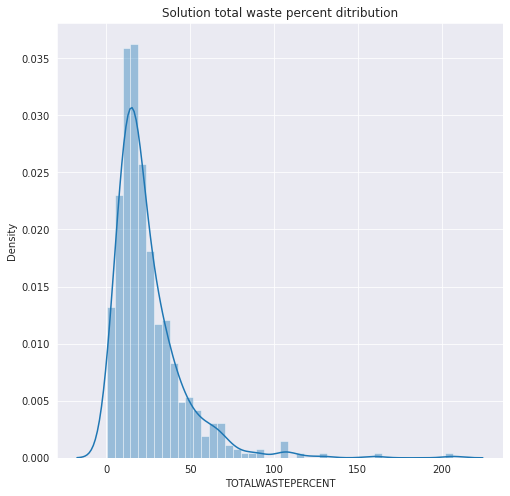

In [25]:
plt.figure(figsize=(8,8))

plt.title('Solution total waste percent ditribution')
sns.distplot(y*10)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y*10, test_size=0.20, random_state = 0)

In [27]:
results = test_regression_models(X_train, X_test, y_train, y_test)

[09:02:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [28]:
results

Model name  ...  Prediction time (s)
7  Polynomial regression 2nd degree  ...             0.000002
4             RandomForestRegressor  ...             0.000135
0                 Linear regression  ...             0.000033
2                        ElasticNet  ...             0.000016
3                     BayesianRidge  ...             0.000016
6                    XGBRFRegressor  ...             0.000010
8  Polynomial regression 3nd degree  ...             0.000002
5             DecisionTreeRegressor  ...             0.000015
1                     SGD regressor  ...             0.000016

[9 rows x 5 columns]

## Experiments with dataset with statistical values for the every jumbo n/10 of the input

Dataset describes the orders of each run using statistical values like:

1.   Number of orders
2.   Number of Distinct widths (orders)
3.   Maximum width of run
4.   Minimum width of run
5.   Average width of orders
6.   Number of reels requested from each order (Average bettween the actual and the upper/over tolerances)
7.   Total waste percentage of solution

###Data visualization and preprocessing


In [29]:
extended_dataset_url = 'https://raw.githubusercontent.com/teoad95/Infusing-business-optimization-processes-with-machine-learning-and-expert-knowledge./main/Datasets/StatisticalOnSeparatedJumboDataset.csv'

In [30]:
extended_runs = pd.read_csv(extended_dataset_url, sep=';')

In [31]:
extended_runs.head()

RUNNUMBER  MaxWidth  ...  WeightedAverage10  TOTALWASTEPERCENT
0          1      6100  ...        5923.613051           0.628959
1          2      5800  ...                NaN           4.398778
2          3      6100  ...        6100.000000           7.828784
3          4      6100  ...        6024.354423           3.385417
4          5      6100  ...        5990.640015           1.081588

[5 rows x 87 columns]

In [32]:
extended_runs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 87 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   RUNNUMBER                564 non-null    int64  
 1   MaxWidth                 564 non-null    int64  
 2   MinWidth                 564 non-null    int64  
 3   NumberOfOrders           564 non-null    int64  
 4   AverageWidth             564 non-null    float64
 5   Deviation                564 non-null    float64
 6   W1                       564 non-null    int64  
 7   W2                       564 non-null    int64  
 8   W3                       564 non-null    int64  
 9   W4                       564 non-null    int64  
 10  W5                       564 non-null    int64  
 11  W6                       564 non-null    int64  
 12  W7                       564 non-null    int64  
 13  W8                       564 non-null    int64  
 14  W9                       5

In [33]:
extended_runs.drop(columns=['RUNNUMBER']).describe()

MaxWidth     MinWidth  ...  WeightedAverage10  TOTALWASTEPERCENT
count   564.000000   564.000000  ...         500.000000         564.000000
mean   5974.290780   760.948582  ...        5957.727406           2.491932
std     224.507419   272.497552  ...          86.037155           2.100439
min    4000.000000   400.000000  ...        5700.000000           0.032345
25%    6000.000000   600.000000  ...        5900.000000           1.211506
50%    6100.000000   600.000000  ...        5958.777227           1.883947
75%    6100.000000   800.000000  ...        6014.031210           3.172152
max    6100.000000  1900.000000  ...        6100.000000          20.675751

[8 rows x 86 columns]

In [34]:
extended_runs = extended_runs.fillna(0)

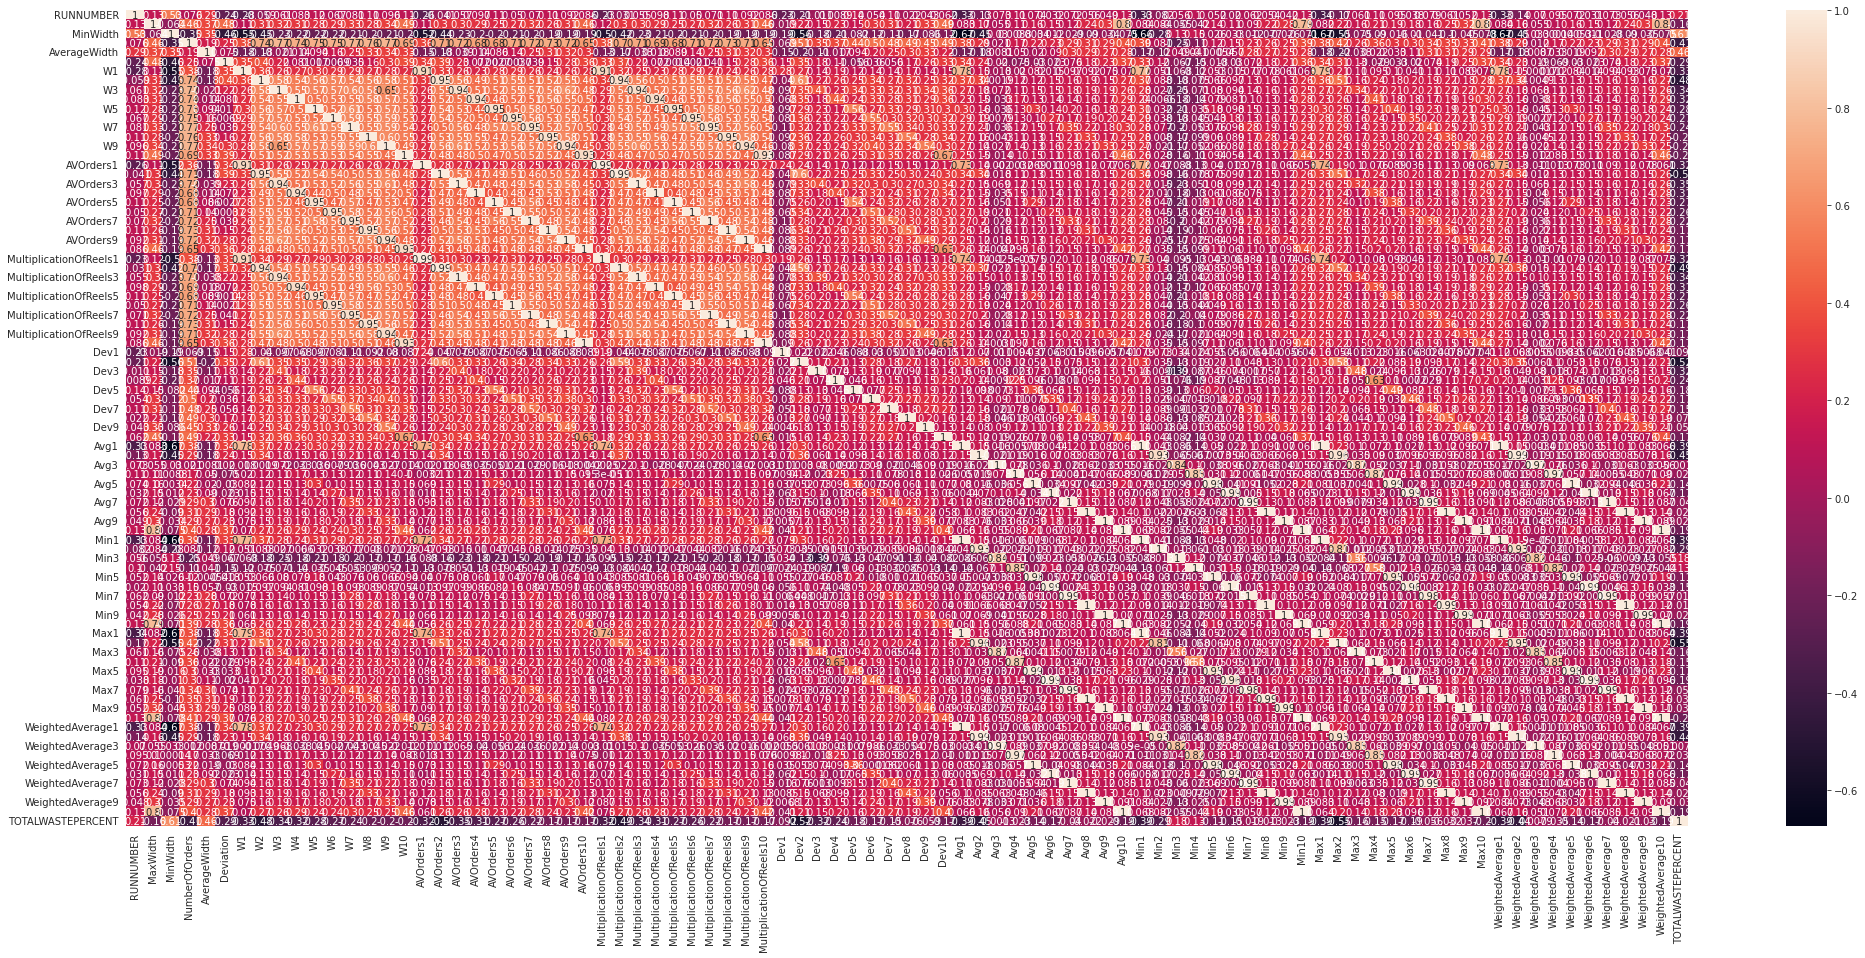

In [35]:
plot_corr_matrix(extended_runs)

### Regression experiments

In [36]:
# Splitting into features and value to be predicted
X = extended_runs.drop(columns=['RUNNUMBER', 'TOTALWASTEPERCENT', 'NumberOfOrders'])
y = extended_runs['TOTALWASTEPERCENT']

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

In [38]:
results = test_regression_models(X_train, X_test, y_train, y_test)

[09:02:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [39]:
results

Model name  ...  Prediction time (s)
4             RandomForestRegressor  ...             0.000143
0                 Linear regression  ...             0.000077
3                     BayesianRidge  ...             0.000083
2                        ElasticNet  ...             0.000093
6                    XGBRFRegressor  ...             0.000026
5             DecisionTreeRegressor  ...             0.000023
7  Polynomial regression 2nd degree  ...             0.000012
8  Polynomial regression 3nd degree  ...             0.000265
1                     SGD regressor  ...             0.000181

[9 rows x 5 columns]

In [40]:
standarize_x_train, standarize_x_test = Standarize_data(X_train, X_test)

In [41]:
results = test_regression_models(standarize_x_train, standarize_x_test, y_train, y_test)

[09:03:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [42]:
results

Model name  ...  Prediction time (s)
4             RandomForestRegressor  ...             0.000150
0                 Linear regression  ...             0.000035
3                     BayesianRidge  ...             0.000033
2                        ElasticNet  ...             0.000034
6                    XGBRFRegressor  ...             0.000026
5             DecisionTreeRegressor  ...             0.000021
7  Polynomial regression 2nd degree  ...             0.000072
8  Polynomial regression 3nd degree  ...             0.000299
1                     SGD regressor  ...             0.000035

[9 rows x 5 columns]

# Classification experiments

Define classes method

In [43]:
def classification_condition(row):
  total_waste_value = row['TOTALWASTEPERCENT']
  if total_waste_value < 1:
    return 0
  if total_waste_value < 2:
    return 1
  return 2

## Classification experiments with dataset with statistical values for the whole jumbo

In [44]:
runs['Class'] = runs.apply (lambda row: classification_condition(row), axis=1)

### Experiments with original data

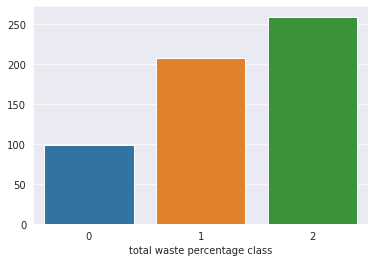

In [45]:
# Checking if Data is balanced
xs = runs['Class'].value_counts().index
ys = runs['Class'].value_counts().values

ax = sns.barplot(xs, ys)
ax.set_xlabel("total waste percentage class")
plt.show()

Define methods:

*   Print metrics
*   Test model



In [46]:
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix

def print_metrics(actual, prediction, model, x_test, y_test):
  print(f"Accuracy Score : {round(accuracy_score(actual, prediction) * 100, 2)}%")
  print(classification_report(actual, prediction))
  plot_confusion_matrix(model, x_test, y_test, cmap=cmap)
  plt.grid(False)
  plt.show()

In [47]:
def test_model(model, xtrain, ytrain, xtest, ytest):
  model.fit(xtrain, ytrain)
  preds = model.predict(xtest)
  print_metrics(ytest, preds, model, xtest, ytest)

In [48]:
# Splitting into features and value to be predicted
X = runs.drop(columns=['RUNNUMBER', 'TOTALWASTEPERCENT', 'Class'])
y = runs['Class']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [51]:
def test_classification_models(l_x_train, l_x_test, l_y_train, l_y_test):
  print('Logistic regression')
  print('--------------------')
  print('--------------------')
  log_reg = LogisticRegression()
  test_model(log_reg, l_x_train, l_y_train, l_x_test, l_y_test)
  print('Gaussian NB')
  print('--------------------')
  print('--------------------')
  nb = GaussianNB()
  test_model(nb, l_x_train, l_y_train, l_x_test, l_y_test)
  print('Random forest classifier')
  print('--------------------')
  print('--------------------')
  rf = RandomForestClassifier()
  test_model(rf, l_x_train, l_y_train, l_x_test, l_y_test)
  print('XGB classifier')
  print('--------------------')
  print('--------------------')
  xgb = XGBClassifier()
  test_model(xgb, l_x_train, l_y_train, l_x_test, l_y_test)
  print('K neighbors')
  print('--------------------')
  print('--------------------')
  knn = KNeighborsClassifier()
  test_model(knn, l_x_train, l_y_train, l_x_test, l_y_test)
  print('Decision tree classifier')
  print('--------------------')
  print('--------------------')
  dt = DecisionTreeClassifier()
  test_model(dt, l_x_train, l_y_train, l_x_test, l_y_test)
  print('SVM')
  print('--------------------')
  print('--------------------')
  svc =  SVC()
  test_model(svc, l_x_train, l_y_train, l_x_test, l_y_test)
  print('Linear discriminant analysis')
  print('--------------------')
  print('--------------------')
  linear_disc = LinearDiscriminantAnalysis()
  test_model(linear_disc, l_x_train, l_y_train, l_x_test, l_y_test)
  print('Decision tree classifier')
  print('--------------------')
  print('--------------------')
  decision_trees = DecisionTreeClassifier()
  test_model(linear_disc, l_x_train, l_y_train, l_x_test, l_y_test)

In [52]:
test_regression_models(X_train, X_test, y_train, y_test)

[09:03:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Model name  ...  Prediction time (s)
4             RandomForestRegressor  ...             0.000129
6                    XGBRFRegressor  ...             0.000010
5             DecisionTreeRegressor  ...             0.000020
0                 Linear regression  ...             0.000035
3                     BayesianRidge  ...             0.000017
2                        ElasticNet  ...             0.000016
7  Polynomial regression 2nd degree  ...             0.000002
8  Polynomial regression 3nd degree  ...             0.000002
1                     SGD regressor  ...             0.000016

[9 rows x 5 columns]

### Experiments with oversampled data


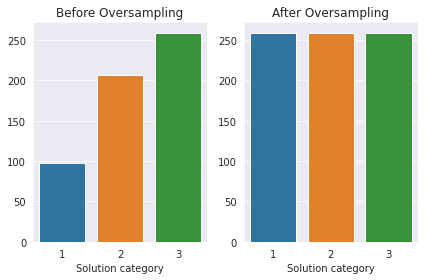

In [53]:
fig, (ax1, ax2) = plt.subplots(1, 2)

sns.barplot(x=['1', '2', '3'], y =[sum(y == 0), sum(y == 1), sum(y == 2)], ax = ax1)
ax1.set_title("Before Oversampling")
ax1.set_xlabel('Solution category')

#Using SMOTE to balance the Data
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 2) 
X_oversampled, y_oversampled = sm.fit_resample(X, y) 

sns.barplot(x=['1', '2', '3'], y =[sum(y_oversampled == 0), sum(y_oversampled == 1), sum(y_oversampled == 2)], ax = ax2)
ax2.set_title("After Oversampling")
ax2.set_xlabel('Solution category')

plt.tight_layout()
plt.show()

In [54]:
X_train_oversampled, X_test_oversampled, y_train_oversampled, y_test_oversampled = train_test_split(X_oversampled, y_oversampled, test_size=0.20, random_state = 0)

Logistic regression
--------------------
--------------------
Accuracy Score : 66.67%
              precision    recall  f1-score   support

           0       0.59      0.65      0.62        52
           1       0.60      0.52      0.56        56
           2       0.82      0.85      0.84        48

    accuracy                           0.67       156
   macro avg       0.67      0.68      0.67       156
weighted avg       0.66      0.67      0.66       156



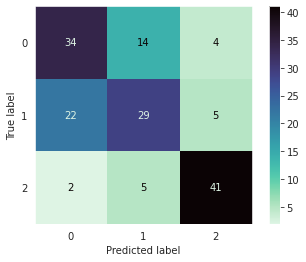

Gaussian NB
--------------------
--------------------
Accuracy Score : 66.67%
              precision    recall  f1-score   support

           0       0.70      0.62      0.65        52
           1       0.56      0.68      0.61        56
           2       0.81      0.71      0.76        48

    accuracy                           0.67       156
   macro avg       0.69      0.67      0.67       156
weighted avg       0.68      0.67      0.67       156



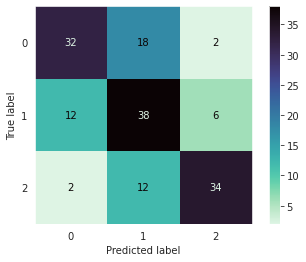

Random forest classifier
--------------------
--------------------
Accuracy Score : 76.92%
              precision    recall  f1-score   support

           0       0.78      0.90      0.84        52
           1       0.72      0.61      0.66        56
           2       0.80      0.81      0.80        48

    accuracy                           0.77       156
   macro avg       0.77      0.77      0.77       156
weighted avg       0.77      0.77      0.76       156



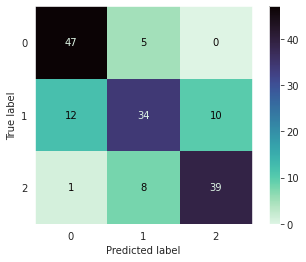

XGB classifier
--------------------
--------------------
Accuracy Score : 73.72%
              precision    recall  f1-score   support

           0       0.74      0.81      0.77        52
           1       0.69      0.61      0.65        56
           2       0.78      0.81      0.80        48

    accuracy                           0.74       156
   macro avg       0.74      0.74      0.74       156
weighted avg       0.73      0.74      0.73       156



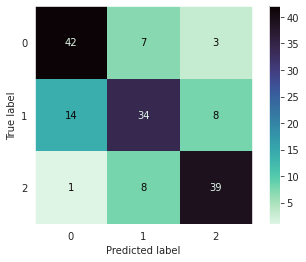

K neighbors
--------------------
--------------------
Accuracy Score : 76.28%
              precision    recall  f1-score   support

           0       0.70      0.94      0.80        52
           1       0.73      0.59      0.65        56
           2       0.90      0.77      0.83        48

    accuracy                           0.76       156
   macro avg       0.78      0.77      0.76       156
weighted avg       0.77      0.76      0.76       156



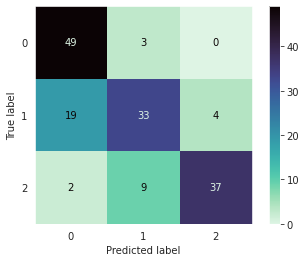

Decision tree classifier
--------------------
--------------------
Accuracy Score : 67.95%
              precision    recall  f1-score   support

           0       0.73      0.87      0.79        52
           1       0.62      0.50      0.55        56
           2       0.67      0.69      0.68        48

    accuracy                           0.68       156
   macro avg       0.67      0.68      0.67       156
weighted avg       0.67      0.68      0.67       156



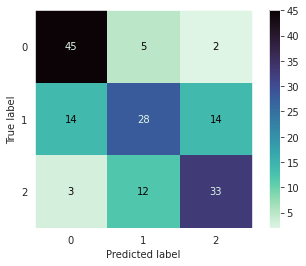

SVM
--------------------
--------------------
Accuracy Score : 66.67%
              precision    recall  f1-score   support

           0       0.63      0.56      0.59        52
           1       0.60      0.57      0.59        56
           2       0.75      0.90      0.82        48

    accuracy                           0.67       156
   macro avg       0.66      0.67      0.67       156
weighted avg       0.66      0.67      0.66       156



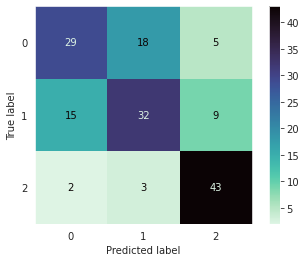

Linear discriminant analysis
--------------------
--------------------
Accuracy Score : 69.87%
              precision    recall  f1-score   support

           0       0.62      0.71      0.66        52
           1       0.65      0.55      0.60        56
           2       0.85      0.85      0.85        48

    accuracy                           0.70       156
   macro avg       0.71      0.71      0.70       156
weighted avg       0.70      0.70      0.70       156



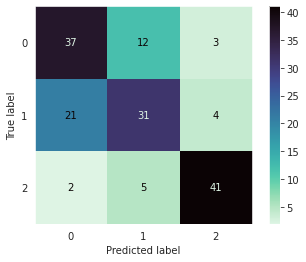

Decision tree classifier
--------------------
--------------------
Accuracy Score : 69.87%
              precision    recall  f1-score   support

           0       0.62      0.71      0.66        52
           1       0.65      0.55      0.60        56
           2       0.85      0.85      0.85        48

    accuracy                           0.70       156
   macro avg       0.71      0.71      0.70       156
weighted avg       0.70      0.70      0.70       156



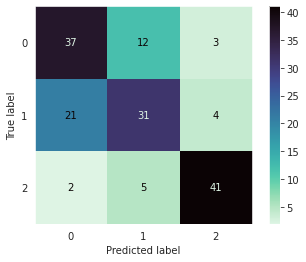

In [55]:
test_classification_models(X_train_oversampled, X_test_oversampled, y_train_oversampled, y_test_oversampled)

## Classification experiments with dataset with statistical values for the every jumbo n/10 of the input

### Experiments with original data

In [56]:
extended_runs['Class'] = extended_runs.apply (lambda row: classification_condition(row), axis=1)

In [57]:
# Splitting into features and value to be predicted
X = extended_runs.drop(columns=['RUNNUMBER', 'TOTALWASTEPERCENT', 'Class'])
y = extended_runs['Class']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

Logistic regression
--------------------
--------------------
Accuracy Score : 55.75%
              precision    recall  f1-score   support

           0       0.60      0.12      0.19        26
           1       0.37      0.62      0.46        34
           2       0.76      0.74      0.75        53

    accuracy                           0.56       113
   macro avg       0.58      0.49      0.47       113
weighted avg       0.61      0.56      0.54       113



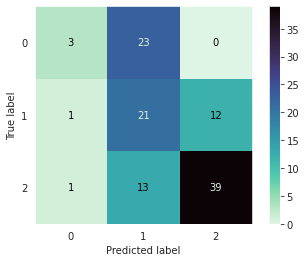

Gaussian NB
--------------------
--------------------
Accuracy Score : 61.06%
              precision    recall  f1-score   support

           0       0.47      0.35      0.40        26
           1       0.49      0.71      0.58        34
           2       0.80      0.68      0.73        53

    accuracy                           0.61       113
   macro avg       0.59      0.58      0.57       113
weighted avg       0.63      0.61      0.61       113



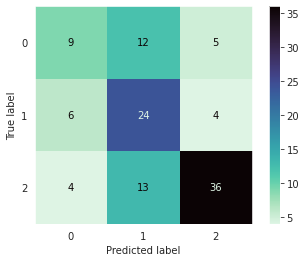

Random forest classifier
--------------------
--------------------
Accuracy Score : 66.37%
              precision    recall  f1-score   support

           0       0.80      0.15      0.26        26
           1       0.48      0.74      0.58        34
           2       0.82      0.87      0.84        53

    accuracy                           0.66       113
   macro avg       0.70      0.59      0.56       113
weighted avg       0.71      0.66      0.63       113



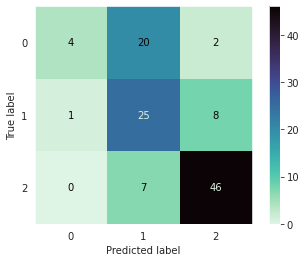

XGB classifier
--------------------
--------------------
Accuracy Score : 66.37%
              precision    recall  f1-score   support

           0       0.73      0.31      0.43        26
           1       0.49      0.71      0.58        34
           2       0.81      0.81      0.81        53

    accuracy                           0.66       113
   macro avg       0.68      0.61      0.61       113
weighted avg       0.70      0.66      0.65       113



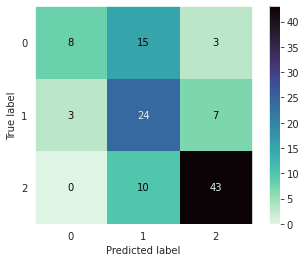

K neighbors
--------------------
--------------------
Accuracy Score : 56.64%
              precision    recall  f1-score   support

           0       0.32      0.27      0.29        26
           1       0.46      0.53      0.49        34
           2       0.75      0.74      0.74        53

    accuracy                           0.57       113
   macro avg       0.51      0.51      0.51       113
weighted avg       0.56      0.57      0.56       113



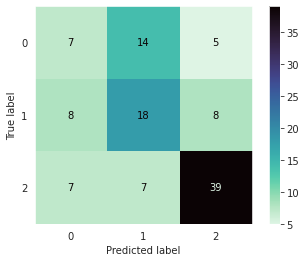

Decision tree classifier
--------------------
--------------------
Accuracy Score : 66.37%
              precision    recall  f1-score   support

           0       0.56      0.38      0.45        26
           1       0.57      0.68      0.62        34
           2       0.76      0.79      0.78        53

    accuracy                           0.66       113
   macro avg       0.63      0.62      0.62       113
weighted avg       0.66      0.66      0.66       113



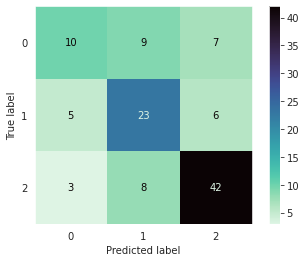

SVM
--------------------
--------------------
Accuracy Score : 59.29%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.56      0.56      0.56        34
           2       0.61      0.91      0.73        53

    accuracy                           0.59       113
   macro avg       0.39      0.49      0.43       113
weighted avg       0.45      0.59      0.51       113



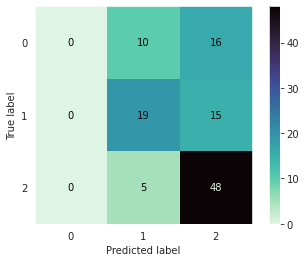

Linear discriminant analysis
--------------------
--------------------
Accuracy Score : 63.72%
              precision    recall  f1-score   support

           0       0.50      0.35      0.41        26
           1       0.49      0.68      0.57        34
           2       0.83      0.75      0.79        53

    accuracy                           0.64       113
   macro avg       0.61      0.59      0.59       113
weighted avg       0.65      0.64      0.64       113



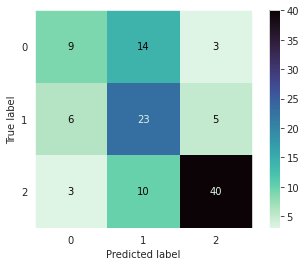

Decision tree classifier
--------------------
--------------------
Accuracy Score : 63.72%
              precision    recall  f1-score   support

           0       0.50      0.35      0.41        26
           1       0.49      0.68      0.57        34
           2       0.83      0.75      0.79        53

    accuracy                           0.64       113
   macro avg       0.61      0.59      0.59       113
weighted avg       0.65      0.64      0.64       113



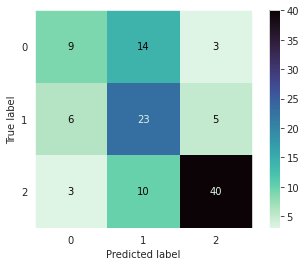

In [59]:
test_classification_models(X_train, X_test, y_train, y_test)

### Experiments with oversampled data


In [60]:
sm = SMOTE(random_state = 2) 
X_oversampled, y_oversampled = sm.fit_resample(X, y) 

In [61]:
X_train_oversampled, X_test_oversampled, y_train_oversampled, y_test_oversampled = train_test_split(X_oversampled, y_oversampled, test_size=0.20, random_state = 0)

Logistic regression
--------------------
--------------------
Accuracy Score : 67.31%
              precision    recall  f1-score   support

           0       0.61      0.79      0.69        52
           1       0.64      0.48      0.55        56
           2       0.79      0.77      0.78        48

    accuracy                           0.67       156
   macro avg       0.68      0.68      0.67       156
weighted avg       0.68      0.67      0.67       156



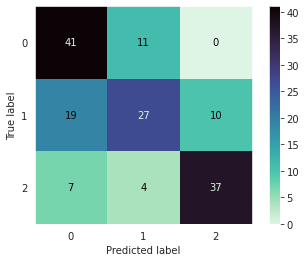

Gaussian NB
--------------------
--------------------
Accuracy Score : 60.26%
              precision    recall  f1-score   support

           0       0.58      0.48      0.53        52
           1       0.57      0.66      0.61        56
           2       0.67      0.67      0.67        48

    accuracy                           0.60       156
   macro avg       0.61      0.60      0.60       156
weighted avg       0.60      0.60      0.60       156



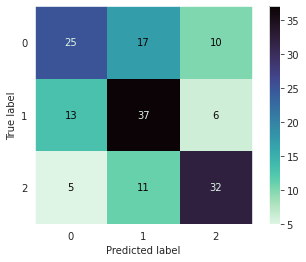

Random forest classifier
--------------------
--------------------
Accuracy Score : 76.92%
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        52
           1       0.76      0.70      0.73        56
           2       0.72      0.79      0.75        48

    accuracy                           0.77       156
   macro avg       0.77      0.77      0.77       156
weighted avg       0.77      0.77      0.77       156



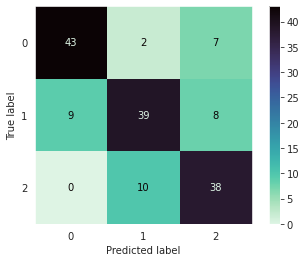

XGB classifier
--------------------
--------------------
Accuracy Score : 76.28%
              precision    recall  f1-score   support

           0       0.76      0.81      0.79        52
           1       0.78      0.62      0.69        56
           2       0.75      0.88      0.81        48

    accuracy                           0.76       156
   macro avg       0.76      0.77      0.76       156
weighted avg       0.76      0.76      0.76       156



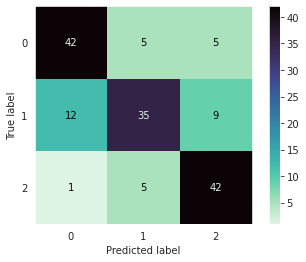

K neighbors
--------------------
--------------------
Accuracy Score : 62.82%
              precision    recall  f1-score   support

           0       0.56      0.88      0.69        52
           1       0.62      0.45      0.52        56
           2       0.79      0.56      0.66        48

    accuracy                           0.63       156
   macro avg       0.66      0.63      0.62       156
weighted avg       0.66      0.63      0.62       156



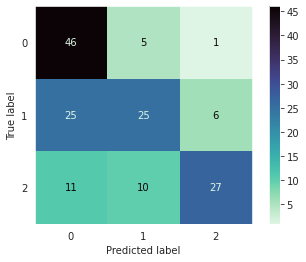

Decision tree classifier
--------------------
--------------------
Accuracy Score : 61.54%
              precision    recall  f1-score   support

           0       0.58      0.73      0.65        52
           1       0.62      0.52      0.56        56
           2       0.66      0.60      0.63        48

    accuracy                           0.62       156
   macro avg       0.62      0.62      0.61       156
weighted avg       0.62      0.62      0.61       156



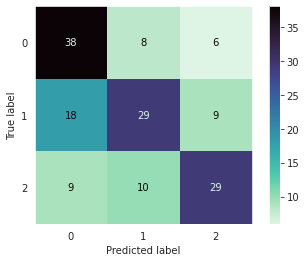

SVM
--------------------
--------------------
Accuracy Score : 67.31%
              precision    recall  f1-score   support

           0       0.62      0.71      0.66        52
           1       0.74      0.45      0.56        56
           2       0.69      0.90      0.78        48

    accuracy                           0.67       156
   macro avg       0.68      0.68      0.67       156
weighted avg       0.68      0.67      0.66       156



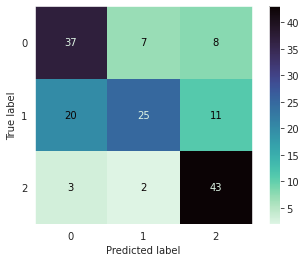

Linear discriminant analysis
--------------------
--------------------
Accuracy Score : 72.44%
              precision    recall  f1-score   support

           0       0.64      0.85      0.73        52
           1       0.71      0.54      0.61        56
           2       0.87      0.81      0.84        48

    accuracy                           0.72       156
   macro avg       0.74      0.73      0.73       156
weighted avg       0.74      0.72      0.72       156



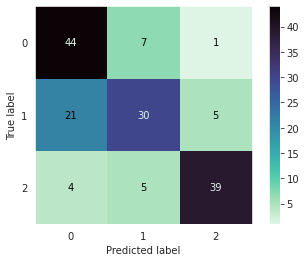

Decision tree classifier
--------------------
--------------------
Accuracy Score : 72.44%
              precision    recall  f1-score   support

           0       0.64      0.85      0.73        52
           1       0.71      0.54      0.61        56
           2       0.87      0.81      0.84        48

    accuracy                           0.72       156
   macro avg       0.74      0.73      0.73       156
weighted avg       0.74      0.72      0.72       156



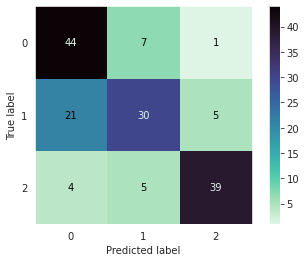

In [62]:
test_classification_models(X_train_oversampled, X_test_oversampled, y_train_oversampled, y_test_oversampled)

# Exploratory regression experiments with statistical values for the whole jumbo

In [63]:
X = runs.drop(columns=['RUNNUMBER', 'TOTALWASTEPERCENT', 'NumberOfOrders', 'Class'])
y = runs['TOTALWASTEPERCENT']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

In [65]:
results = test_regression_models(X_train, X_test, y_train, y_test)

[09:04:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [66]:
results

Model name  ...  Prediction time (s)
7  Polynomial regression 2nd degree  ...             0.000002
4             RandomForestRegressor  ...             0.000141
0                 Linear regression  ...             0.000019
2                        ElasticNet  ...             0.000018
3                     BayesianRidge  ...             0.000024
6                    XGBRFRegressor  ...             0.000010
8  Polynomial regression 3nd degree  ...             0.000041
5             DecisionTreeRegressor  ...             0.000017
1                     SGD regressor  ...             0.000051

[9 rows x 5 columns]

## Pass input from MinMaxScaler

In [67]:
from sklearn import preprocessing

In [68]:
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(X)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.20, random_state = 0)

In [70]:
results = test_regression_models(X_train, X_test, y_train, y_test)

[09:04:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [71]:
results

Model name  ...  Prediction time (s)
4             RandomForestRegressor  ...             0.000120
0                 Linear regression  ...             0.000002
3                     BayesianRidge  ...             0.000002
8  Polynomial regression 3nd degree  ...             0.000003
6                    XGBRFRegressor  ...             0.000004
1                     SGD regressor  ...             0.000001
7  Polynomial regression 2nd degree  ...             0.000002
5             DecisionTreeRegressor  ...             0.000001
2                        ElasticNet  ...             0.000002

[9 rows x 5 columns]

## Pass input from StandardScaler


In [72]:
standardScaler = preprocessing.StandardScaler()
x_standarized = standardScaler.fit_transform(X)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.20, random_state = 0)

In [74]:
results = test_regression_models(X_train, X_test, y_train, y_test)

[09:04:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [75]:
results

Model name  ...  Prediction time (s)
4             RandomForestRegressor  ...             0.000113
0                 Linear regression  ...             0.000004
3                     BayesianRidge  ...             0.000001
8  Polynomial regression 3nd degree  ...             0.000037
6                    XGBRFRegressor  ...             0.000004
1                     SGD regressor  ...             0.000001
7  Polynomial regression 2nd degree  ...             0.000002
5             DecisionTreeRegressor  ...             0.000001
2                        ElasticNet  ...             0.000001

[9 rows x 5 columns]

## Results with stratified K fold validation

In [76]:
from sklearn.linear_model import LinearRegression, SGDRegressor, ElasticNet, BayesianRidge, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRFRegressor
from sklearn.preprocessing import PolynomialFeatures
from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedKFold
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def test_regression_models_with_K_Fold_Validation(l_x, l_y, k = 10, repeats = 3):
  results = {}
  names_list = []
  mean_absolute_error_score = []
  # prepare the cross-validation procedure
  cv = RepeatedKFold(n_splits=k, n_repeats=repeats, random_state=1)

  names_list.append('Linear regression')
  mean_absolute_error_score.append(-1*(mean(cross_val_score(LinearRegression(), l_x, l_y, cv=cv, n_jobs=-1, scoring= 'neg_mean_absolute_error'))))

  names_list.append('SGD regressor')
  mean_absolute_error_score.append(-1*(mean(cross_val_score(SGDRegressor(), l_x, l_y, cv=cv, n_jobs=-1, scoring= 'neg_mean_absolute_error'))))

  names_list.append('ElasticNet')
  mean_absolute_error_score.append(-1*(mean(cross_val_score(ElasticNet(), l_x, l_y, cv=cv, n_jobs=-1, scoring= 'neg_mean_absolute_error'))))

  names_list.append('BayesianRidge')
  mean_absolute_error_score.append(-1*(mean(cross_val_score(BayesianRidge(), l_x, l_y, cv=cv, n_jobs=-1, scoring= 'neg_mean_absolute_error'))))

  names_list.append('RandomForestRegressor')
  mean_absolute_error_score.append(-1*(mean(cross_val_score(RandomForestRegressor(), l_x, l_y, cv=cv, n_jobs=-1, scoring= 'neg_mean_absolute_error'))))

  names_list.append('DecisionTreeRegressor')
  mean_absolute_error_score.append(-1*(mean(cross_val_score(DecisionTreeRegressor(), l_x, l_y, cv=cv, n_jobs=-1, scoring= 'neg_mean_absolute_error'))))

  names_list.append('XGBRFRegressor')
  mean_absolute_error_score.append(-1*(mean(cross_val_score(XGBRFRegressor(), l_x, l_y, cv=cv, n_jobs=-1, scoring= 'neg_mean_absolute_error'))))

  names_list.append('Polynomial regression 2nd degree')
  poly_reg = PolynomialFeatures(degree=2)
  mean_absolute_error_score.append(-1*(mean(cross_val_score(LinearRegression(), poly_reg.fit_transform(l_x), l_y, cv=cv, n_jobs=-1, scoring= 'neg_mean_absolute_error'))))

  names_list.append('Polynomial regression 3nd degree')
  poly_reg = PolynomialFeatures(degree=3)
  mean_absolute_error_score.append(-1*(mean(cross_val_score(LinearRegression(), poly_reg.fit_transform(l_x), l_y, cv=cv, n_jobs=-1, scoring= 'neg_mean_absolute_error'))))

  data = {'Model name':names_list,
          'Mean absolute error':mean_absolute_error_score}
          
  return pd.DataFrame.from_dict(data).sort_values(by=['Mean absolute error'])

In [78]:
results = test_regression_models_with_K_Fold_Validation(x_standarized, y)

In [79]:
results

Model name  Mean absolute error
4             RandomForestRegressor             0.803686
7  Polynomial regression 2nd degree             0.811878
6                    XGBRFRegressor             0.866087
3                     BayesianRidge             0.902194
1                     SGD regressor             0.903825
0                 Linear regression             0.905223
8  Polynomial regression 3nd degree             0.919986
2                        ElasticNet             1.053938
5             DecisionTreeRegressor             1.058680

## Model tuning

In [146]:
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd2
def calculate_feature_importance(l_model, l_x, l_y, use_property_coef = False):
  l_x_train, l_x_test, l_y_train, l_y_test = train_test_split(l_x, l_y, test_size=0.20, random_state = 0)
  l_model.fit(l_x_train, l_y_train)
  column_name_list = []
  feature_importance_list = []
  for i in range(len(l_x.columns)):
    column_name_list.append(l_x.columns[i])
    if not use_property_coef:
      feature_importance_list.append(l_model.feature_importances_[i])
      continue
    feature_importance_list.append(l_model.coef_[i])
  # initialize data of lists.
  data = {'Column name':column_name_list,
          'feature importance':feature_importance_list}
  return pd2.DataFrame.from_dict(data).sort_values(by=['feature importance'], ascending=False)

### Bayesian ridge regressor tuning

In [ ]:
random_grid = {"n_iter": np.arange(100, 10000, 100),
                      "alpha_1": [0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1],
                      "alpha_2": [0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1],
                      "lambda_1": [0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1],
                      "lambda_2": [0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1],
                      "fit_intercept" : [True, False],
                      "normalize": [True, False]
                      }
br = BayesianRidge()
br_random = RandomizedSearchCV(estimator = br, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
br_random.fit(x_standarized, y)
br_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'alpha_1': 1e-06,
 'alpha_2': 1e-05,
 'fit_intercept': True,
 'lambda_1': 0.01,
 'lambda_2': 1e-07,
 'n_iter': 3400,
 'normalize': False}

In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
br = BayesianRidge(alpha_1 = 1e-06, alpha_2 = 1e-05, lambda_1 = 0.01, lambda_2 = 1e-07, n_iter = 3400)
'MAE :%.3f' % (-1*(mean(cross_val_score(br, x_standarized, y, cv=cv, n_jobs=-1, scoring= 'neg_mean_absolute_error'))))

'MAE :0.902'

In [ ]:
feature_importance = calculate_feature_importance(BayesianRidge(alpha_1 = 1e-06, alpha_2 = 1e-05, lambda_1 = 0.01, lambda_2 = 1e-07, n_iter = 3400), X, y, True)

In [ ]:
feature_importance

Column name  feature importance
5  WeightedAverageWidth            0.002758
1              MinWidth            0.002624
2          AverageWidth            0.000199
3             Deviation            0.000116
4      AVGNUMBEROFREELS           -0.000827
0              MaxWidth           -0.001568

### Random forest regressor tuning

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [ ]:
# Fit the random search model
rf_random.fit(x_standarized, y)
# Fit the random search model
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'bootstrap': True,
 'max_depth': 100,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 800}

In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
rf = RandomForestRegressor(max_depth =100, min_samples_leaf= 1, min_samples_split = 2 ,n_estimators= 800)
'MAE :%.3f' % (-1*(mean(cross_val_score(rf, x_standarized, y, cv=cv, n_jobs=-1, scoring= 'neg_mean_absolute_error'))))

'MAE :0.804'

In [ ]:
feature_importance = calculate_feature_importance(RandomForestRegressor(max_depth =100, min_samples_leaf= 1, min_samples_split = 2 ,n_estimators= 800), X, y)

In [ ]:
feature_importance

Column name  feature importance
1              MinWidth            0.395097
5  WeightedAverageWidth            0.227176
4      AVGNUMBEROFREELS            0.162032
3             Deviation            0.083754
2          AverageWidth            0.078520
0              MaxWidth            0.053422

### Decision tree regressor tuning

In [ ]:
criterion = ['squared_error', 'friedman_mse', "absolute_error", "poisson"]
splitter = ['best', 'random']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

random_grid = {'criterion': criterion,
               'splitter': splitter,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_features': max_features}

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
dtr = DecisionTreeRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
dtr_random = RandomizedSearchCV(estimator = dtr, param_distributions = random_grid, n_iter = 100, cv = 10, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
dtr_random.fit(x_standarized, y)
dtr_random.best_params_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


{'criterion': 'friedman_mse',
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'splitter': 'best'}

In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
dtr = DecisionTreeRegressor(criterion = 'friedman_mse', max_depth = 10, max_features= 'auto', min_samples_leaf=4, min_samples_split=5, splitter= 'best')
'DecisionTreeClassifier after tuning MAE :%.3f' % (-1*(mean(cross_val_score(dtr, x_standarized, y, cv=cv, n_jobs=-1, scoring= 'neg_mean_absolute_error'))))

'DecisionTreeClassifier after tuning MAE :1.000'

In [ ]:
feature_importance = calculate_feature_importance(DecisionTreeRegressor(criterion = 'friedman_mse', max_depth = 10, max_features= 'auto', min_samples_leaf=4, min_samples_split=5, splitter= 'best'), X, y)

In [ ]:
feature_importance

Column name  feature importance
1              MinWidth            0.469767
5  WeightedAverageWidth            0.222778
4      AVGNUMBEROFREELS            0.158447
3             Deviation            0.063554
0              MaxWidth            0.048892
2          AverageWidth            0.036562

### Elastic net regressor tuning

In [ ]:
random_grid = {"max_iter": [1, 5, 10, 100, 1000],
                      "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                      "l1_ratio": np.arange(0.0, 1.0, 0.1),
                      "selection": ["cyclic", "random"]}
en = ElasticNet()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
en_random = RandomizedSearchCV(estimator = en, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
en_random.fit(x_standarized, y)
en_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'alpha': 0.1, 'l1_ratio': 0.5, 'max_iter': 100, 'selection': 'cyclic'}

In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
'ElasticNet after tuning MAE :%.3f' % (-1*(mean(cross_val_score(ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter = 100, selection= 'cyclic'), X, y, cv=cv, n_jobs=-1, scoring= 'neg_mean_absolute_error'))))

'ElasticNet after tuning MAE :0.905'

In [ ]:
feature_importance = calculate_feature_importance(ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter = 100, selection= 'cyclic'), X, y, True)

In [ ]:
feature_importance

Column name  feature importance
5  WeightedAverageWidth            0.002868
1              MinWidth            0.002685
3             Deviation            0.000227
2          AverageWidth            0.000082
4      AVGNUMBEROFREELS           -0.000818
0              MaxWidth           -0.001628

### SGD regressor tuning

In [ ]:
penalty = ['l2', 'l1', 'elasticnet']
alpha = [0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1]
l1_ratio = np.arange(0.05, 1.0, 0.05)
max_iter = np.arange(100, 10000, 100)
tolerance = [0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1]
epsilon = [0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1]
learning_rate =  ['invscaling', 'constant', 'optimal', 'adaptive']

random_grid = {'penalty':penalty,
               'alpha': alpha,
               'l1_ratio': l1_ratio,
               'max_iter': max_iter,
               'tol': tolerance,
               'epsilon': epsilon,
               'learning_rate': learning_rate}
sgd = SGDRegressor()
sgd_random = RandomizedSearchCV(estimator = sgd, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
sgd_random.fit(x_standarized, y)
sgd_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'alpha': 0.001,
 'epsilon': 1e-05,
 'l1_ratio': 0.05,
 'learning_rate': 'constant',
 'max_iter': 4000,
 'penalty': 'elasticnet',
 'tol': 1e-06}

In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
'SGD after tuning MAE :%.3f' % (-1*(mean(cross_val_score(SGDRegressor(alpha=0.1, l1_ratio=0.05, epsilon=1e-05, learning_rate='constant', max_iter = 4000, penalty= 'elasticnet', tol=1e-06), X, y, cv=cv, n_jobs=-1, scoring= 'neg_mean_absolute_error'))))

'SGD after tuning MAE :337277985643645888.000'

In [ ]:
feature_importance = calculate_feature_importance(ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter = 100, selection= 'cyclic'), X, y, True)

In [ ]:
feature_importance

Column name  feature importance
5  WeightedAverageWidth            0.002868
1              MinWidth            0.002685
3             Deviation            0.000227
2          AverageWidth            0.000082
4      AVGNUMBEROFREELS           -0.000818
0              MaxWidth           -0.001628

## Deep learning experiments

Import pre required libraries

In [89]:
import tensorflow as tf
from tensorflow.keras import Sequential as seq
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
from keras.callbacks import EarlyStopping

In [81]:
tf.random.set_seed(42)

In [82]:
def plot_loss_and_val_loss(hist, loss_label = 'Mean Absolute Error (MAE)', title=''):
  fig, ax1 = plt.subplots(1, 1)
  ax1.plot(hist.epoch, hist.history['loss'], color='b', label='Loss')
  ax1.plot(hist.epoch, hist.history['val_loss'], color='orange', label='Val_loss')
  ax1.set_xticks(range(0, len(hist.epoch)))
  ax1.set_title('Training Error ' + title )
  ax1.set_ylabel(loss_label, fontsize=12)
  ax1.set_xlabel('#Epoch', fontsize=12)
  fig.set_size_inches(18.5, 10.5)
  plt.legend()
  plt.show()

In [83]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)

In [84]:
epochs = 4000
batch_size = 2

In [85]:
X

MaxWidth  MinWidth  ...  AVGNUMBEROFREELS  WeightedAverageWidth
0        6100       500  ...        914.380037           2841.885883
1        5800       900  ...        527.073171           3267.406710
2        6100      1500  ...        578.356221           3635.490177
3        6100       500  ...        588.075038           3634.856429
4        6100       400  ...        835.282809           2654.450214
..        ...       ...  ...               ...                   ...
559      6000      1500  ...        249.586314           2861.050278
560      5900      1200  ...       1465.970295           3785.334810
561      5800      1300  ...        684.963969           3268.778311
562      5700      1200  ...        524.079826           3465.263706
563      6100      1300  ...        702.826494           3279.632655

[564 rows x 6 columns]

### Single dense model experiments

In [ ]:
model = seq()
model.add(Dense(6, activation = 'relu'))
model.add(Dense(1, activation = 'relu'))
model.compile(loss='mae', optimizer='adam')

In [ ]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                        epochs=epochs, batch_size=batch_size, verbose=0, shuffle = True, callbacks = [es])

Restoring model weights from the end of the best epoch: 124.
Epoch 00134: early stopping


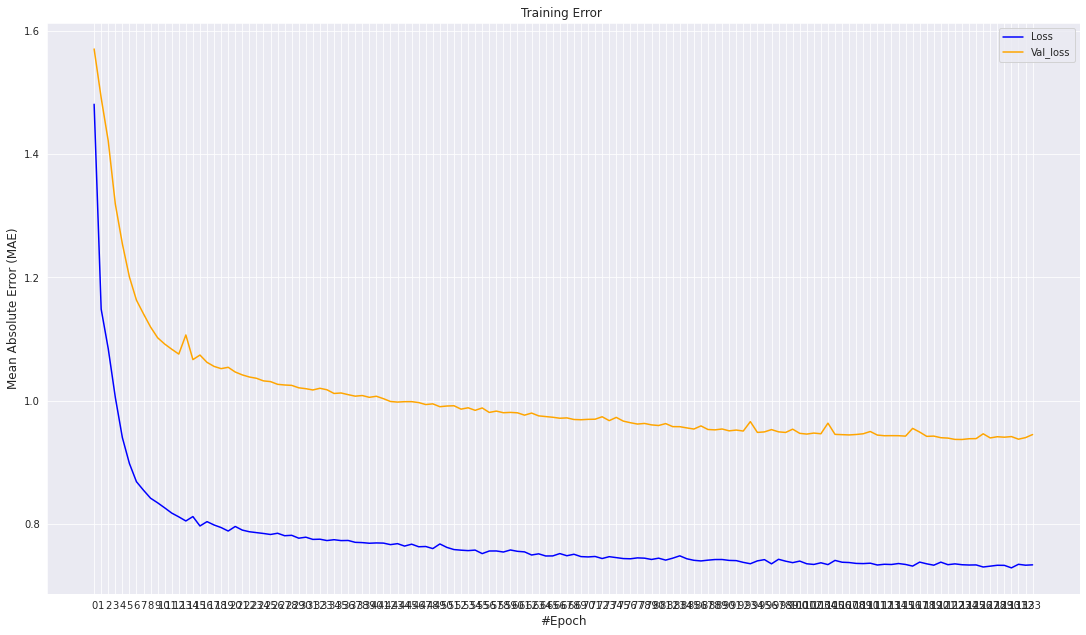

In [ ]:
plot_loss_and_val_loss(hist)

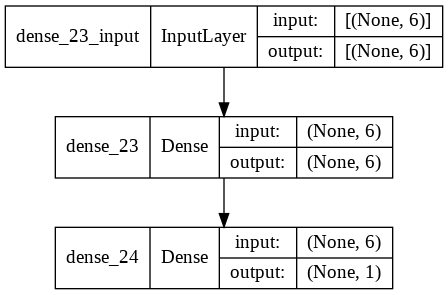

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model = seq()
model.add(Dense(6, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))
model.compile(loss='mae', optimizer='adam')

In [ ]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                        epochs=epochs, batch_size=batch_size, verbose=0, shuffle = True, callbacks = [es])

Restoring model weights from the end of the best epoch: 200.
Epoch 00210: early stopping


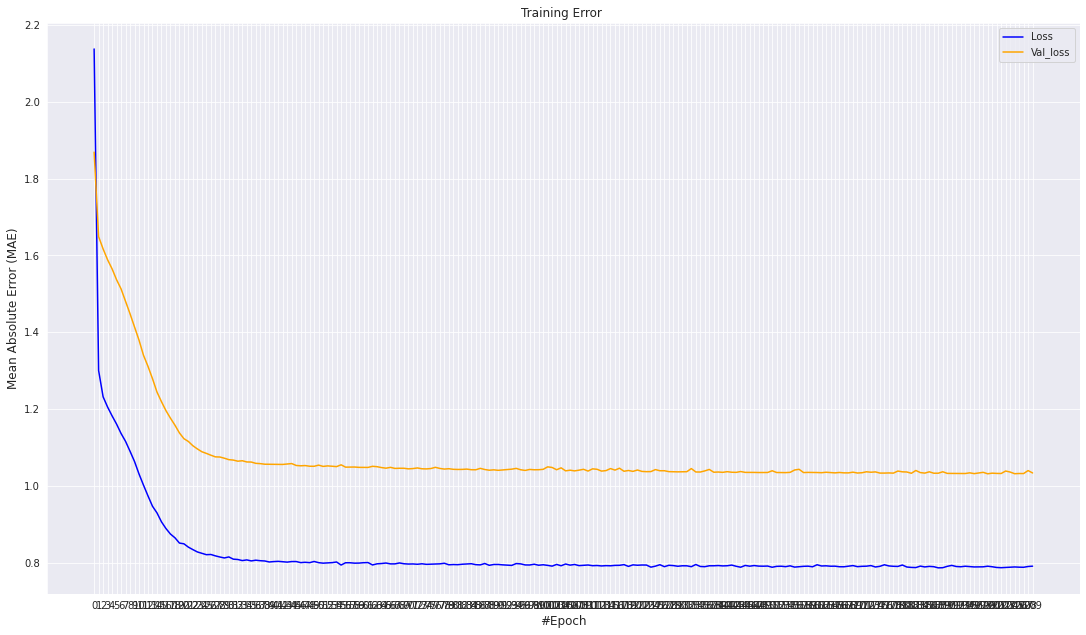

In [ ]:
plot_loss_and_val_loss(hist)

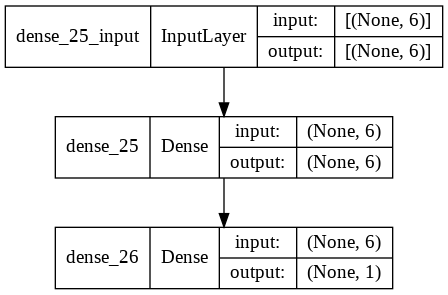

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

### Two denses model experiments

In [ ]:
model = seq()
model.add(Dense(6, activation = 'relu'))
model.add(Dense(3, activation = 'relu'))
model.add(Dense(1, activation = 'relu'))
model.compile(loss='mae', optimizer='adam')

In [ ]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                        epochs=epochs, batch_size=batch_size, verbose=0, shuffle = True, callbacks = [es])

Restoring model weights from the end of the best epoch: 1.
Epoch 00011: early stopping


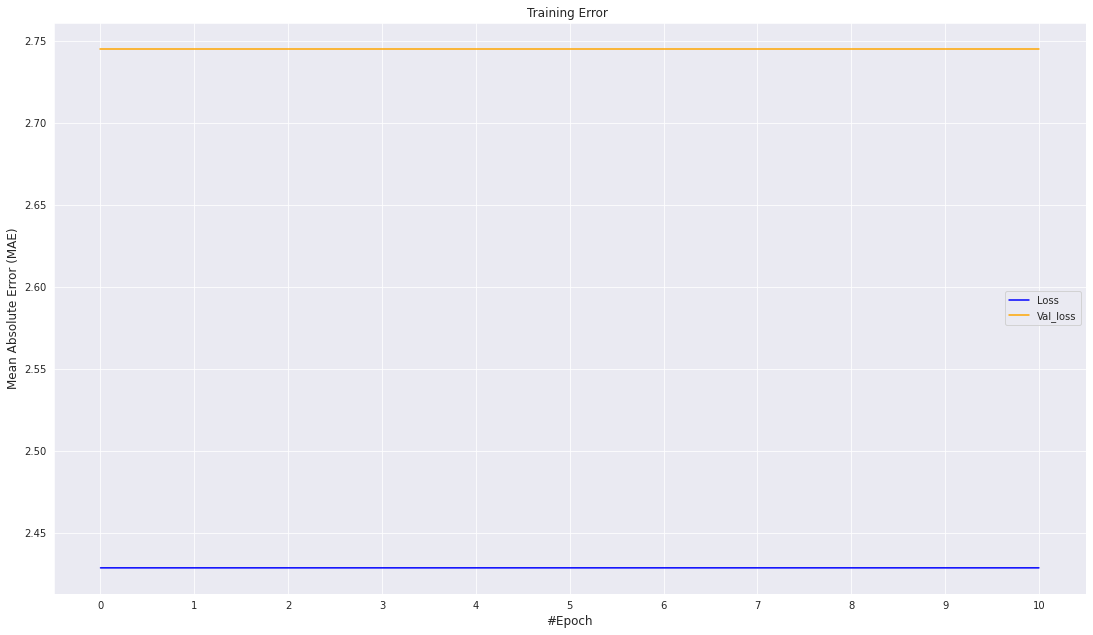

In [ ]:
plot_loss_and_val_loss(hist)

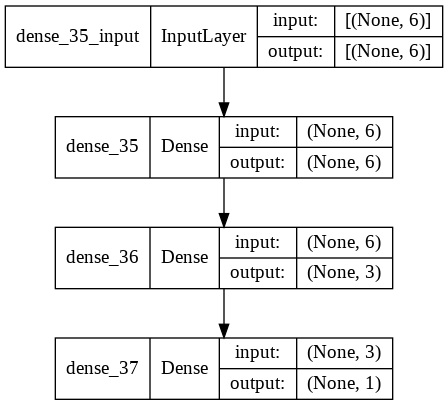

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model = seq()
model.add(Dense(6, activation = 'relu'))
model.add(Dense(3, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))
model.compile(loss='mae', optimizer='adam')

In [ ]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                        epochs=epochs, batch_size=batch_size, verbose=0, shuffle = True, callbacks = [es])

Restoring model weights from the end of the best epoch: 46.
Epoch 00056: early stopping


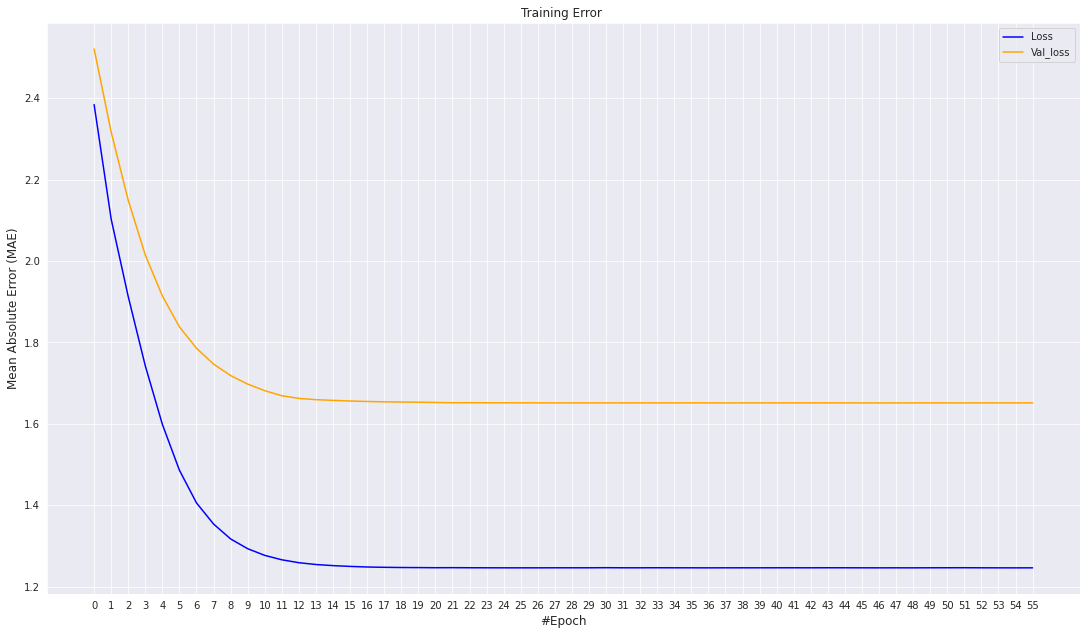

In [ ]:
plot_loss_and_val_loss(hist)

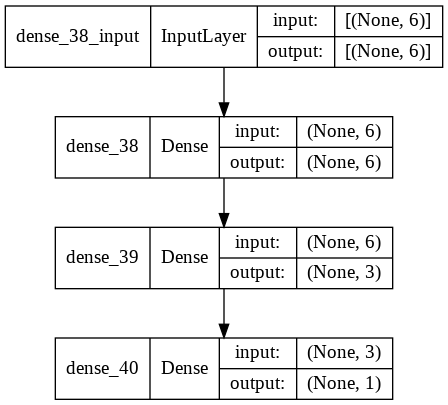

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

### Three denses model experiments

In [ ]:
model = seq()
model.add(Dense(6, activation = 'relu'))
model.add(Dense(3, activation = 'relu'))
model.add(Dense(2, activation = 'relu'))
model.add(Dense(1, activation = 'relu'))
model.compile(loss='mae', optimizer='adam')

In [ ]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                        epochs=epochs, batch_size=batch_size, verbose=0, shuffle = True, callbacks = [es])

Restoring model weights from the end of the best epoch: 53.
Epoch 00063: early stopping


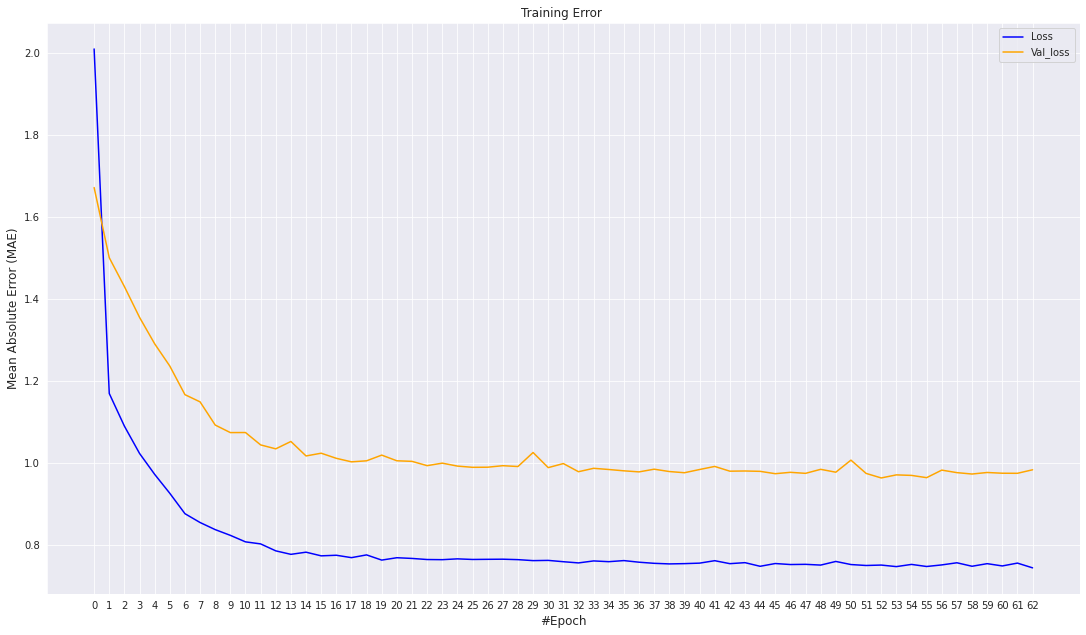

In [ ]:
plot_loss_and_val_loss(hist)

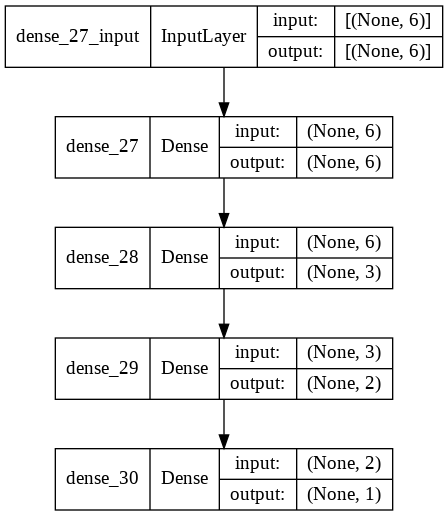

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model = seq()
model.add(Dense(6, activation = 'relu'))
model.add(Dense(3, activation = 'relu'))
model.add(Dense(2, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))
model.compile(loss='mae', optimizer='adam')

In [ ]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                        epochs=epochs, batch_size=batch_size, verbose=0, shuffle = True, callbacks = [es])

Restoring model weights from the end of the best epoch: 93.
Epoch 00103: early stopping


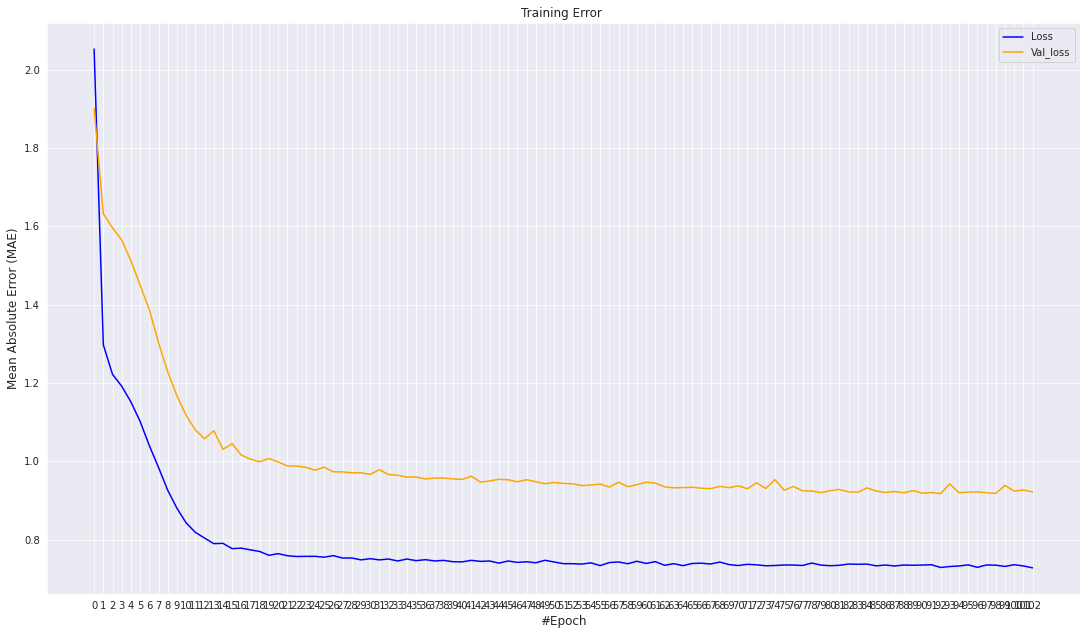

In [ ]:
plot_loss_and_val_loss(hist)

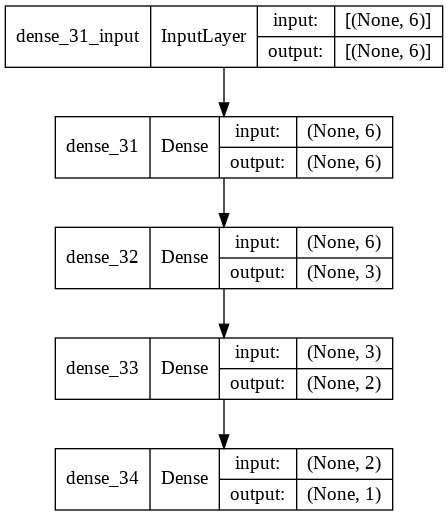

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model = seq()
model.add(Dense(12, activation = 'relu', input_dim = 6))
model.add(Dense(6, activation = 'relu'))
model.add(Dense(3, activation = 'relu'))
model.add(Dense(2, activation = 'relu'))
model.add(Dense(1, activation = 'relu'))
model.compile(loss='mae', optimizer='adam')

In [ ]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                        epochs=epochs, batch_size=batch_size, verbose=0, shuffle = True, callbacks = [es])

Restoring model weights from the end of the best epoch: 1.
Epoch 00011: early stopping


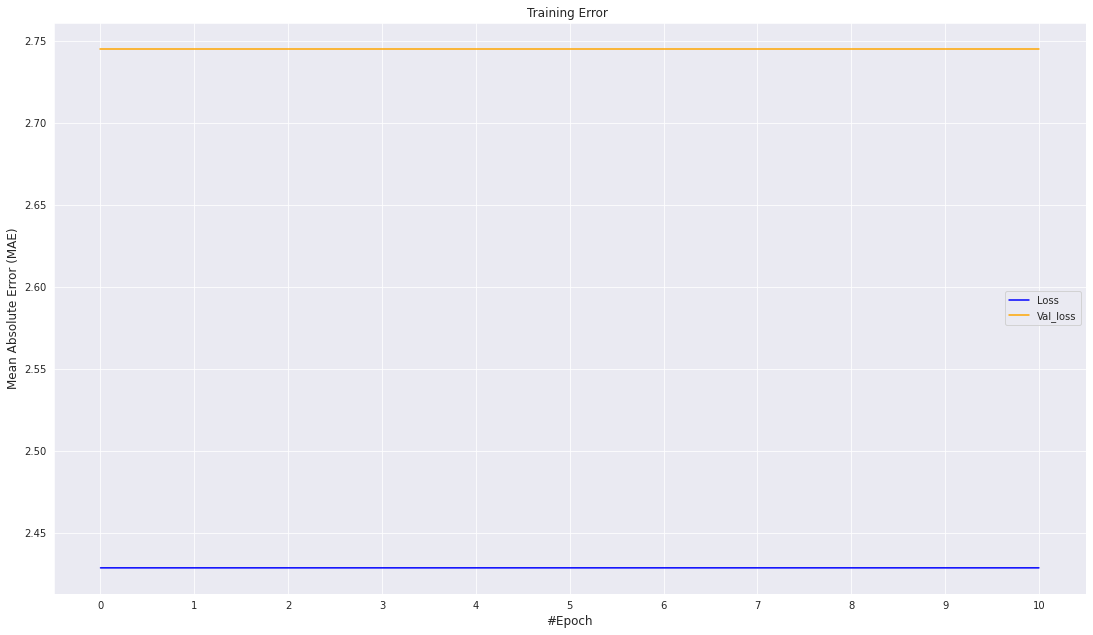

In [ ]:
plot_loss_and_val_loss(hist)

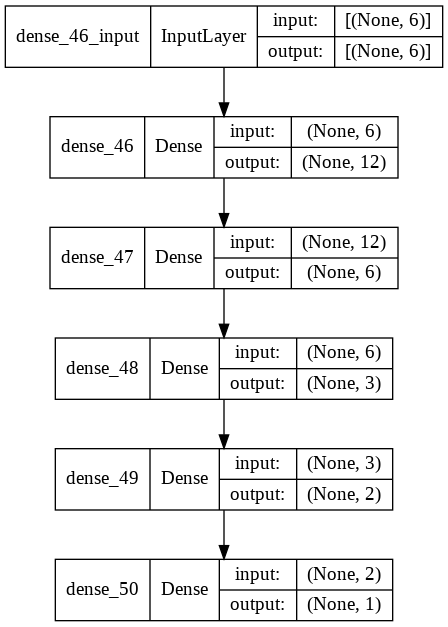

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model = seq()
model.add(Dense(12, activation = 'relu', input_dim = 6))
model.add(Dense(6, activation = 'relu'))
model.add(Dense(3, activation = 'relu'))
model.add(Dense(2, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))
model.compile(loss='mae', optimizer='adam')

In [ ]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                        epochs=epochs, batch_size=batch_size, verbose=0, shuffle = True, callbacks = [es])

Restoring model weights from the end of the best epoch: 53.
Epoch 00063: early stopping


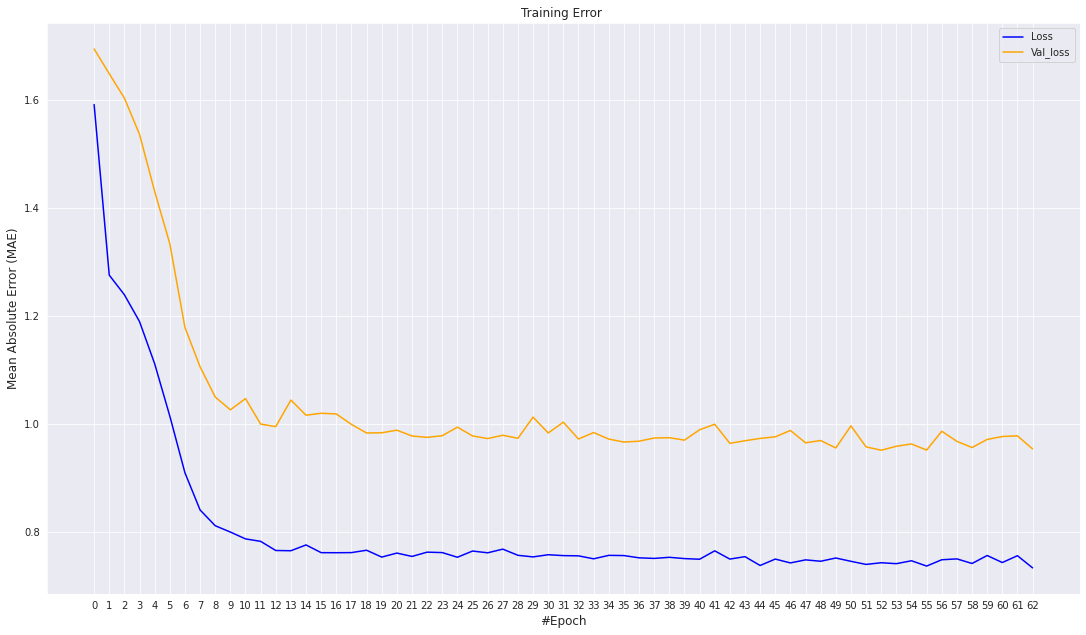

In [ ]:
plot_loss_and_val_loss(hist)

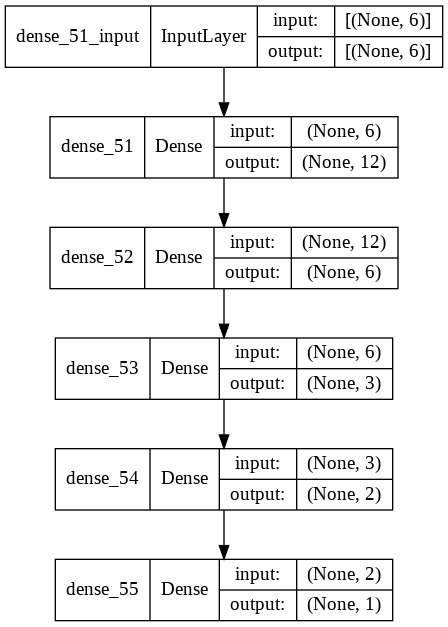

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

### CNN experiments

In [87]:
tf.layers.conv2d()

AttributeError: ignored

# Exploratory regression experiments with extended dataset


## Experiments after column selection

In [90]:
extended_runs.columns

Index(['RUNNUMBER', 'MaxWidth', 'MinWidth', 'NumberOfOrders', 'AverageWidth',
       'Deviation', 'W1', 'W2', 'W3', 'W4', 'W5', 'W6', 'W7', 'W8', 'W9',
       'W10', 'AVOrders1', 'AVOrders2', 'AVOrders3', 'AVOrders4', 'AVOrders5',
       'AVOrders6', 'AVOrders7', 'AVOrders8', 'AVOrders9', 'AVOrders10',
       'MultiplicationOfReels1', 'MultiplicationOfReels2',
       'MultiplicationOfReels3', 'MultiplicationOfReels4',
       'MultiplicationOfReels5', 'MultiplicationOfReels6',
       'MultiplicationOfReels7', 'MultiplicationOfReels8',
       'MultiplicationOfReels9', 'MultiplicationOfReels10', 'Dev1', 'Dev2',
       'Dev3', 'Dev4', 'Dev5', 'Dev6', 'Dev7', 'Dev8', 'Dev9', 'Dev10', 'Avg1',
       'Avg2', 'Avg3', 'Avg4', 'Avg5', 'Avg6', 'Avg7', 'Avg8', 'Avg9', 'Avg10',
       'Min1', 'Min2', 'Min3', 'Min4', 'Min5', 'Min6', 'Min7', 'Min8', 'Min9',
       'Min10', 'Max1', 'Max2', 'Max3', 'Max4', 'Max5', 'Max6', 'Max7', 'Max8',
       'Max9', 'Max10', 'WeightedAverage1', 'WeightedAverage2',
 

In [91]:
extended_runs_with_selected_columns = extended_runs.drop(columns=['RUNNUMBER',
       'MultiplicationOfReels1', 'MultiplicationOfReels2',
       'MultiplicationOfReels3', 'MultiplicationOfReels4',
       'MultiplicationOfReels5', 'MultiplicationOfReels6',
       'MultiplicationOfReels7', 'MultiplicationOfReels8',
       'MultiplicationOfReels9', 'MultiplicationOfReels10', 'Avg1',
       'Avg2', 'Avg3', 'Avg4', 'Avg5', 'Avg6', 'Avg7', 'Avg8', 'Avg9', 'Avg10',
       'Min1', 'Min2', 'Min3', 'Min4', 'Min5', 'Min6', 'Min7', 'Min8', 'Min9',
       'Min10', 'Max1', 'Max2', 'Max3', 'Max4', 'Max5', 'Max6', 'Max7', 'Max8',
       'Max9', 'Max10', 'Class'])

In [92]:
extended_runs_with_selected_columns

MaxWidth  MinWidth  ...  WeightedAverage10  TOTALWASTEPERCENT
0        6100       500  ...        5923.613051           0.628959
1        5800       900  ...           0.000000           4.398778
2        6100      1500  ...        6100.000000           7.828784
3        6100       500  ...        6024.354423           3.385417
4        6100       400  ...        5990.640015           1.081588
..        ...       ...  ...                ...                ...
559      6000      1500  ...        5945.932104           1.762372
560      5900      1200  ...        5808.053156           4.239353
561      5800      1300  ...        5761.073493           5.033417
562      5700      1200  ...           0.000000           4.259620
563      6100      1300  ...        5872.083185           2.755251

[564 rows x 46 columns]

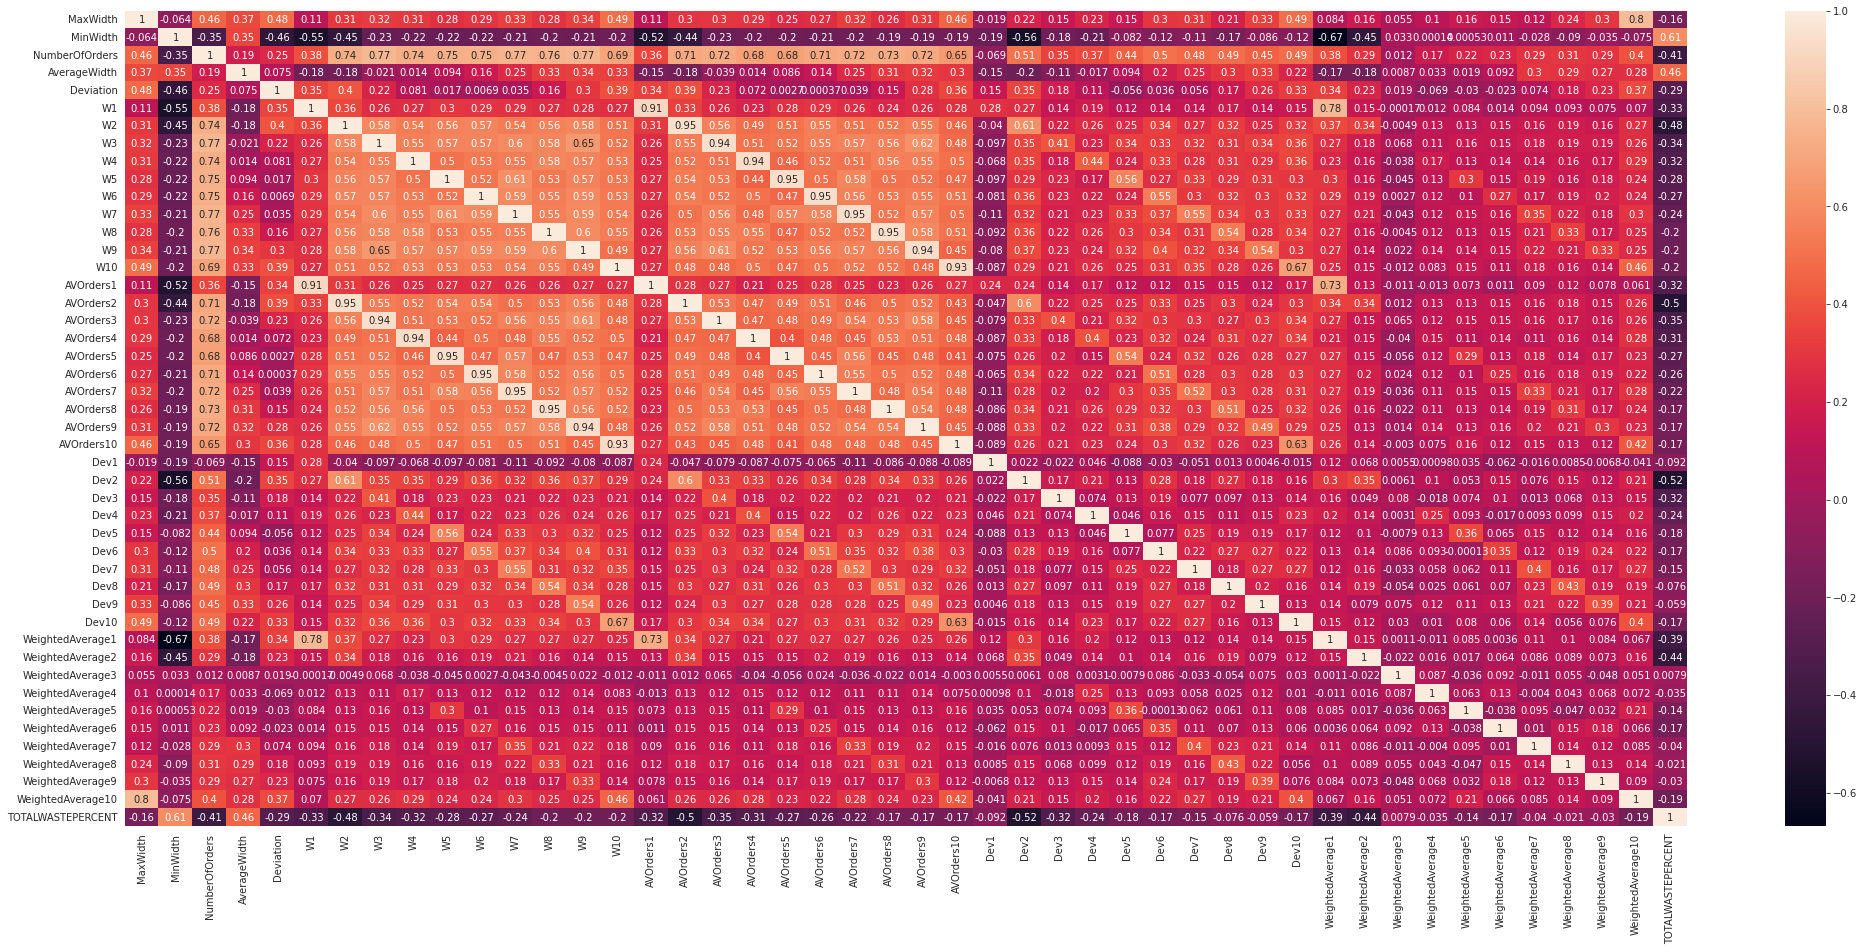

In [93]:
plot_corr_matrix(extended_runs_with_selected_columns)

In [94]:
extended_runs_with_selected_columns = extended_runs_with_selected_columns.drop(columns=['W1', 'W2', 'W3', 'W4', 'W5', 'W6', 'W7', 'W8', 'W9', 'W10'])

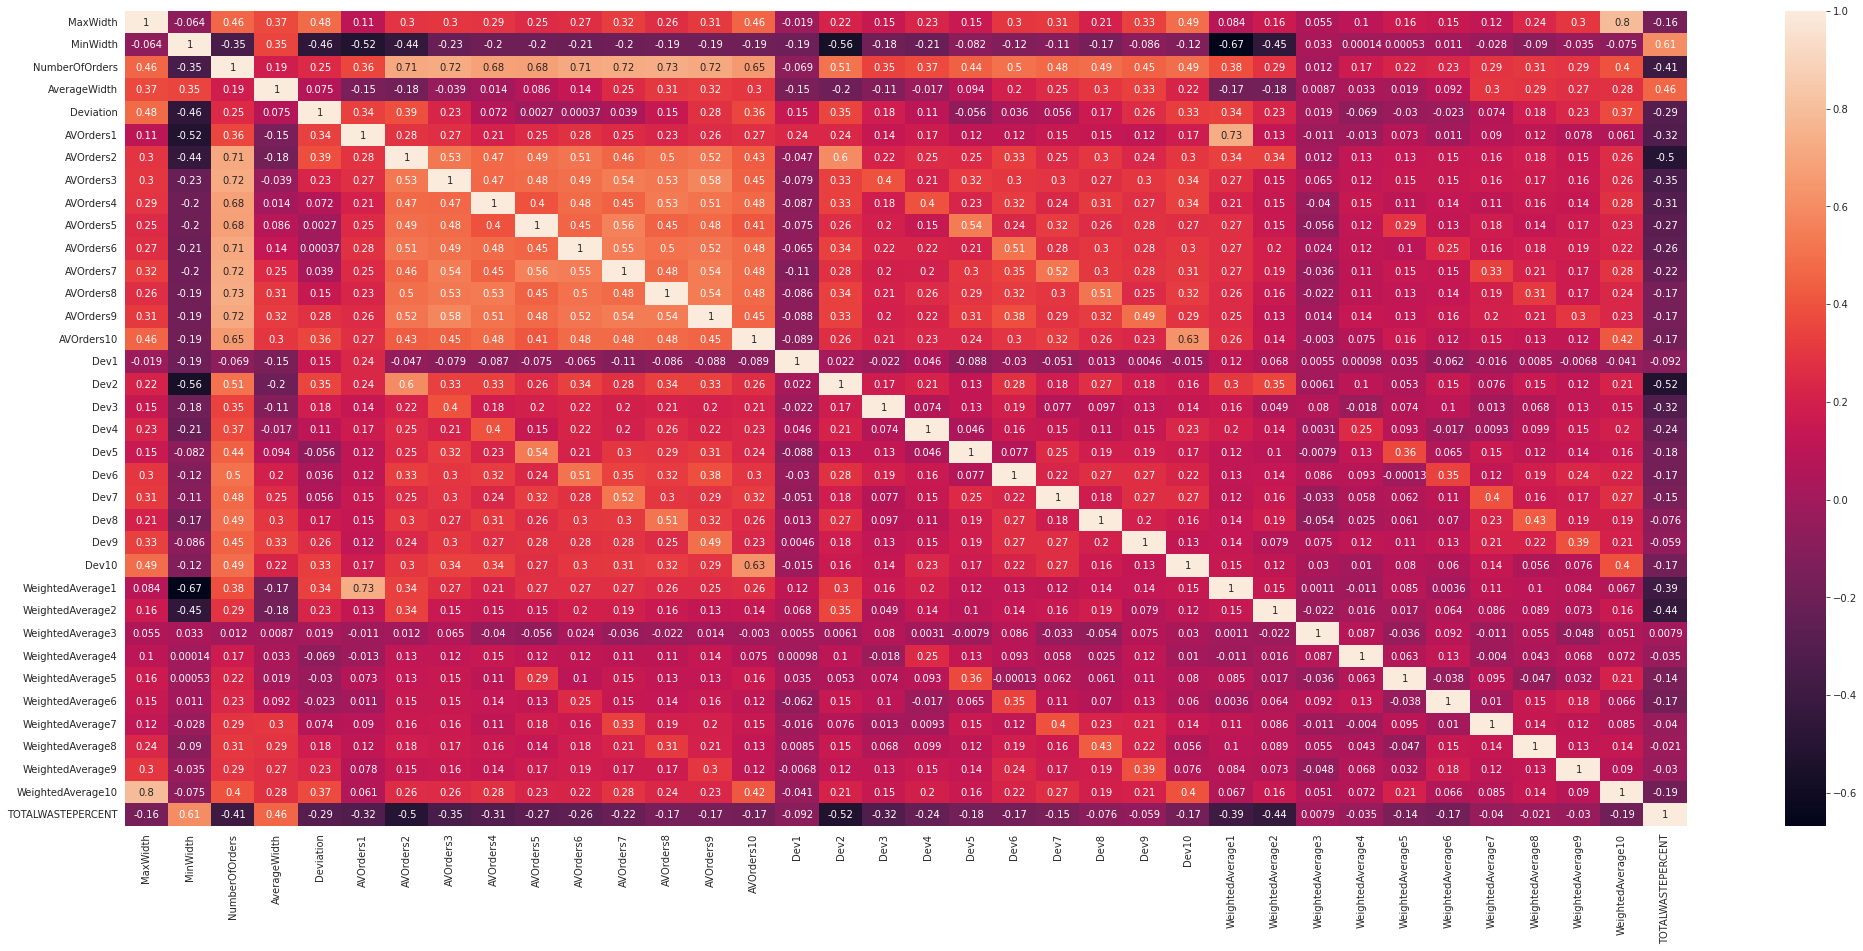

In [95]:
plot_corr_matrix(extended_runs_with_selected_columns)

In [96]:
X = extended_runs_with_selected_columns.drop(columns=['TOTALWASTEPERCENT'])
y = extended_runs_with_selected_columns['TOTALWASTEPERCENT']

In [97]:
X

MaxWidth  MinWidth  ...  WeightedAverage9  WeightedAverage10
0        6100       500  ...          0.000000        5923.613051
1        5800       900  ...       5608.050258           0.000000
2        6100      1500  ...       5557.505498        6100.000000
3        6100       500  ...       5368.663566        6024.354423
4        6100       400  ...       5300.000000        5990.640015
..        ...       ...  ...               ...                ...
559      6000      1500  ...          0.000000        5945.932104
560      5900      1200  ...       5364.976942        5808.053156
561      5800      1300  ...       5131.900538        5761.073493
562      5700      1200  ...       5579.628680           0.000000
563      6100      1300  ...       5300.000000        5872.083185

[564 rows x 35 columns]

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

In [99]:
results = test_regression_models(X_train, X_test, y_train, y_test)

[09:31:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [100]:
results

Model name  ...  Prediction time (s)
4             RandomForestRegressor  ...             0.000134
0                 Linear regression  ...             0.000030
2                        ElasticNet  ...             0.000027
3                     BayesianRidge  ...             0.000026
6                    XGBRFRegressor  ...             0.000017
5             DecisionTreeRegressor  ...             0.000019
8  Polynomial regression 3nd degree  ...             0.000015
7  Polynomial regression 2nd degree  ...             0.000004
1                     SGD regressor  ...             0.000027

[9 rows x 5 columns]

### Pass input from MinMaxScaler

In [101]:
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(X)

In [102]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.20, random_state = 0)

In [103]:
results = test_regression_models(X_train, X_test, y_train, y_test)

[09:32:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [104]:
results

Model name  ...  Prediction time (s)
4             RandomForestRegressor  ...             0.000114
3                     BayesianRidge  ...             0.000002
0                 Linear regression  ...             0.000001
1                     SGD regressor  ...             0.000002
6                    XGBRFRegressor  ...             0.000007
5             DecisionTreeRegressor  ...             0.000001
8  Polynomial regression 3nd degree  ...             0.000013
2                        ElasticNet  ...             0.000002
7  Polynomial regression 2nd degree  ...             0.000003

[9 rows x 5 columns]

### Pass input from StandardScaler

In [105]:
standardScaler = preprocessing.StandardScaler()
x_standarized = standardScaler.fit_transform(X)

In [106]:
X_train, X_test, y_train, y_test = train_test_split(x_standarized, y, test_size=0.20, random_state = 0)

In [107]:
results = test_regression_models(X_train, X_test, y_train, y_test)

[09:32:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [108]:
results

Model name  ...  Prediction time (s)
4             RandomForestRegressor  ...             0.000119
3                     BayesianRidge  ...             0.000002
0                 Linear regression  ...             0.000002
1                     SGD regressor  ...             0.000002
6                    XGBRFRegressor  ...             0.000006
5             DecisionTreeRegressor  ...             0.000002
2                        ElasticNet  ...             0.000033
8  Polynomial regression 3nd degree  ...             0.000013
7  Polynomial regression 2nd degree  ...             0.000039

[9 rows x 5 columns]

## Results with stratified K fold validation

In [173]:
results = test_regression_models_with_K_Fold_Validation(x_standarized, y)

In [174]:
results

Model name  Mean absolute error
4             RandomForestRegressor             0.819735
6                    XGBRFRegressor             0.895422
3                     BayesianRidge             0.919670
1                     SGD regressor             0.945370
0                 Linear regression             0.945540
2                        ElasticNet             1.029464
8  Polynomial regression 3nd degree             1.136703
5             DecisionTreeRegressor             1.155260
7  Polynomial regression 2nd degree             2.370620

## Model tuning

### Bayesian ridge regressor tuning

In [147]:
random_grid = {"n_iter": np.arange(100, 10000, 100),
                      "alpha_1": [0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1],
                      "alpha_2": [0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1],
                      "lambda_1": [0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1],
                      "lambda_2": [0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1],
                      "fit_intercept" : [True, False],
                      "normalize": [True, False]
                      }
br = BayesianRidge()
br_random = RandomizedSearchCV(estimator = br, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
br_random.fit(x_standarized, y)
br_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'alpha_1': 1e-06,
 'alpha_2': 1e-05,
 'fit_intercept': True,
 'lambda_1': 0.01,
 'lambda_2': 1e-07,
 'n_iter': 3400,
 'normalize': False}

In [148]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
br = BayesianRidge(alpha_1 = 1e-06, alpha_2 = 1e-05, lambda_1 = 0.01, lambda_2 = 1e-07, n_iter = 3400)
'MAE :%.3f' % (-1*(mean(cross_val_score(br, x_standarized, y, cv=cv, n_jobs=-1, scoring= 'neg_mean_absolute_error'))))

'MAE :0.920'

In [149]:
feature_importance = calculate_feature_importance(BayesianRidge(alpha_1 = 1e-06, alpha_2 = 1e-05, lambda_1 = 0.01, lambda_2 = 1e-07, n_iter = 3400), X, y, True)

In [150]:
feature_importance

Column name  feature importance
3        AverageWidth            0.002435
1            MinWidth            0.002195
14         AVOrders10            0.000376
28   WeightedAverage4            0.000274
23               Dev9            0.000186
13          AVOrders9            0.000053
9           AVOrders5            0.000045
32   WeightedAverage8            0.000026
22               Dev8            0.000022
12          AVOrders8           -0.000025
15               Dev1           -0.000035
2      NumberOfOrders           -0.000059
33   WeightedAverage9           -0.000064
5           AVOrders1           -0.000065
25   WeightedAverage1           -0.000089
34  WeightedAverage10           -0.000112
27   WeightedAverage3           -0.000118
31   WeightedAverage7           -0.000118
11          AVOrders7           -0.000134
20               Dev6           -0.000172
7           AVOrders3           -0.000178
10          AVOrders6           -0.000180
8           AVOrders4           -0.000212
4           Deviation           -0.000213
29   WeightedAverage5           -0.000262
30   WeightedAverage6           -0.000278
0            MaxWidth           -0.000302
24              Dev10           -0.000315
19               Dev5           -0.000405
18               Dev4           -0.000487
21               Dev7           -0.000503
26   WeightedAverage2           -0.000510
6           AVOrders2           -0.000834
16               Dev2           -0.001102
17               Dev3           -0.001428

### Random forest regressor tuning

In [151]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [152]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [153]:
# Fit the random search model
rf_random.fit(x_standarized, y)
# Fit the random search model
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'bootstrap': True,
 'max_depth': 80,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 200}

In [154]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
rf = RandomForestRegressor(max_depth =80, min_samples_leaf= 4, min_samples_split = 5 ,n_estimators= 200)
'MAE :%.3f' % (-1*(mean(cross_val_score(rf, x_standarized, y, cv=cv, n_jobs=-1, scoring= 'neg_mean_absolute_error'))))

'MAE :0.808'

In [155]:
feature_importance = calculate_feature_importance(RandomForestRegressor(max_depth =80, min_samples_leaf= 4, min_samples_split = 5 ,n_estimators= 200), X, y)

In [156]:
feature_importance

Column name  feature importance
6           AVOrders2            0.296019
1            MinWidth            0.242440
3        AverageWidth            0.070948
7           AVOrders3            0.041594
5           AVOrders1            0.040279
9           AVOrders5            0.039550
32   WeightedAverage8            0.026851
27   WeightedAverage3            0.020872
17               Dev3            0.020512
33   WeightedAverage9            0.014581
30   WeightedAverage6            0.014012
4           Deviation            0.013229
12          AVOrders8            0.011969
14         AVOrders10            0.011519
31   WeightedAverage7            0.011357
13          AVOrders9            0.010861
29   WeightedAverage5            0.010473
10          AVOrders6            0.010342
26   WeightedAverage2            0.009041
8           AVOrders4            0.008824
19               Dev5            0.007285
16               Dev2            0.006919
18               Dev4            0.006612
28   WeightedAverage4            0.006587
22               Dev8            0.006530
34  WeightedAverage10            0.006522
2      NumberOfOrders            0.005861
11          AVOrders7            0.005710
20               Dev6            0.005146
23               Dev9            0.005120
21               Dev7            0.004146
0            MaxWidth            0.003602
24              Dev10            0.003476
25   WeightedAverage1            0.001183
15               Dev1            0.000027

### Decision tree regressor tuning

In [157]:
criterion = ['squared_error', 'friedman_mse', "absolute_error", "poisson"]
splitter = ['best', 'random']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

random_grid = {'criterion': criterion,
               'splitter': splitter,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_features': max_features}

In [158]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
dtr = DecisionTreeRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
dtr_random = RandomizedSearchCV(estimator = dtr, param_distributions = random_grid, n_iter = 100, cv = 10, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
dtr_random.fit(x_standarized, y)
dtr_random.best_params_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


{'criterion': 'absolute_error',
 'max_depth': 80,
 'max_features': 'log2',
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'splitter': 'random'}

In [170]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
dtr = DecisionTreeRegressor(criterion = 'squared_error', max_depth = 40, max_features= 'log2', min_samples_leaf=4, min_samples_split=5, splitter= 'random')
'DecisionTreeClassifier after tuning MAE :%.3f' % (-1*(mean(cross_val_score(dtr, x_standarized, y, cv=cv, n_jobs=-1, scoring= 'neg_mean_absolute_error'))))

'DecisionTreeClassifier after tuning MAE :1.123'

In [171]:
feature_importance = calculate_feature_importance(DecisionTreeRegressor(criterion = 'squared_error', max_depth = 40, max_features= 'log2', min_samples_leaf=4, min_samples_split=5, splitter= 'random'), X, y)

In [172]:
feature_importance

Column name  feature importance
5           AVOrders1            0.281743
16               Dev2            0.231677
1            MinWidth            0.101804
3        AverageWidth            0.098583
24              Dev10            0.029378
8           AVOrders4            0.027719
23               Dev9            0.026672
26   WeightedAverage2            0.024017
29   WeightedAverage5            0.023881
6           AVOrders2            0.022343
2      NumberOfOrders            0.022204
33   WeightedAverage9            0.015473
7           AVOrders3            0.015384
0            MaxWidth            0.015145
30   WeightedAverage6            0.014990
21               Dev7            0.013469
14         AVOrders10            0.008533
22               Dev8            0.006962
27   WeightedAverage3            0.005739
12          AVOrders8            0.004457
18               Dev4            0.003483
25   WeightedAverage1            0.002131
31   WeightedAverage7            0.001256
11          AVOrders7            0.001184
13          AVOrders9            0.000549
4           Deviation            0.000480
9           AVOrders5            0.000314
32   WeightedAverage8            0.000192
34  WeightedAverage10            0.000164
17               Dev3            0.000075
28   WeightedAverage4            0.000000
20               Dev6            0.000000
19               Dev5            0.000000
15               Dev1            0.000000
10          AVOrders6            0.000000

### Elastic net regressor tuning

In [162]:
random_grid = {"max_iter": [1, 5, 10, 100, 1000],
                      "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                      "l1_ratio": np.arange(0.0, 1.0, 0.1),
                      "selection": ["cyclic", "random"]}
en = ElasticNet()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
en_random = RandomizedSearchCV(estimator = en, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
en_random.fit(x_standarized, y)
en_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'alpha': 0.1, 'l1_ratio': 0.9, 'max_iter': 100, 'selection': 'cyclic'}

In [163]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
'ElasticNet after tuning MAE :%.3f' % (-1*(mean(cross_val_score(ElasticNet(alpha=0.1, l1_ratio=0.9, max_iter = 100, selection= 'cyclic'), X, y, cv=cv, n_jobs=-1, scoring= 'neg_mean_absolute_error'))))

'ElasticNet after tuning MAE :0.944'

In [164]:
feature_importance = calculate_feature_importance(ElasticNet(alpha=0.1, l1_ratio=0.9, max_iter = 100, selection= 'cyclic'), X, y, True)

In [165]:
feature_importance

Column name  feature importance
3        AverageWidth            0.002621
1            MinWidth            0.002227
14         AVOrders10            0.000561
28   WeightedAverage4            0.000371
23               Dev9            0.000160
9           AVOrders5            0.000135
7           AVOrders3            0.000031
32   WeightedAverage8            0.000028
22               Dev8            0.000022
5           AVOrders1            0.000000
2      NumberOfOrders           -0.000000
15               Dev1           -0.000000
25   WeightedAverage1           -0.000026
20               Dev6           -0.000035
33   WeightedAverage9           -0.000047
12          AVOrders8           -0.000047
13          AVOrders9           -0.000055
34  WeightedAverage10           -0.000095
8           AVOrders4           -0.000097
4           Deviation           -0.000111
31   WeightedAverage7           -0.000122
27   WeightedAverage3           -0.000145
11          AVOrders7           -0.000148
10          AVOrders6           -0.000176
29   WeightedAverage5           -0.000257
30   WeightedAverage6           -0.000303
26   WeightedAverage2           -0.000424
0            MaxWidth           -0.000438
6           AVOrders2           -0.000706
19               Dev5           -0.000913
21               Dev7           -0.001015
24              Dev10           -0.001240
18               Dev4           -0.001433
16               Dev2           -0.002188
17               Dev3           -0.002758

### SGD regressor tuning

In [166]:
penalty = ['l2', 'l1', 'elasticnet']
alpha = [0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1]
l1_ratio = np.arange(0.05, 1.0, 0.05)
max_iter = np.arange(100, 10000, 100)
tolerance = [0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1]
epsilon = [0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1]
learning_rate =  ['invscaling', 'constant', 'optimal', 'adaptive']

random_grid = {'penalty':penalty,
               'alpha': alpha,
               'l1_ratio': l1_ratio,
               'max_iter': max_iter,
               'tol': tolerance,
               'epsilon': epsilon,
               'learning_rate': learning_rate}
sgd = SGDRegressor()
sgd_random = RandomizedSearchCV(estimator = sgd, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
sgd_random.fit(x_standarized, y)
sgd_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'alpha': 0.1,
 'epsilon': 0.01,
 'l1_ratio': 0.1,
 'learning_rate': 'adaptive',
 'max_iter': 8700,
 'penalty': 'l1',
 'tol': 1e-06}

In [167]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
'SGD after tuning MAE :%.3f' % (-1*(mean(cross_val_score(SGDRegressor(alpha=0.1, l1_ratio=0.1, epsilon=0.01, learning_rate='adaptive', max_iter = 8700, penalty= 'l1', tol=1e-06), X, y, cv=cv, n_jobs=-1, scoring= 'neg_mean_absolute_error'))))

'SGD after tuning MAE :2476358667014048.000'

In [168]:
feature_importance = calculate_feature_importance(SGDRegressor(alpha=0.1, l1_ratio=0.1, epsilon=0.01, learning_rate='adaptive', max_iter = 8700, penalty= 'l1', tol=1e-06), X, y, True)

In [169]:
feature_importance

Column name  feature importance
19               Dev5        4.146007e+13
23               Dev9        2.695289e+13
5           AVOrders1        2.492302e+13
21               Dev7        1.951449e+13
18               Dev4        1.542549e+13
24              Dev10        1.343807e+13
4           Deviation        1.321331e+13
10          AVOrders6        4.766713e+12
1            MinWidth        2.494738e+12
8           AVOrders4        1.607714e+12
6           AVOrders2        1.134070e+12
27   WeightedAverage3        1.060263e+12
30   WeightedAverage6        8.329528e+11
11          AVOrders7        6.947556e+11
12          AVOrders8        1.922254e+11
15               Dev1        5.342266e+10
34  WeightedAverage10       -2.956821e+11
26   WeightedAverage2       -4.268358e+11
32   WeightedAverage8       -5.909356e+11
31   WeightedAverage7       -6.850117e+11
33   WeightedAverage9       -7.199190e+11
3        AverageWidth       -7.623824e+11
29   WeightedAverage5       -1.087784e+12
2      NumberOfOrders       -1.383612e+12
0            MaxWidth       -1.392519e+12
7           AVOrders3       -1.722078e+12
22               Dev8       -1.979455e+12
28   WeightedAverage4       -5.026500e+12
13          AVOrders9       -5.292891e+12
25   WeightedAverage1       -5.343642e+12
17               Dev3       -5.914692e+12
9           AVOrders5       -5.996612e+12
16               Dev2       -6.802343e+12
14         AVOrders10       -8.245611e+12
20               Dev6       -1.152331e+13

## Deep learning experiments


We will continue experiments by using deep learning

In [110]:
X

MaxWidth  MinWidth  ...  WeightedAverage9  WeightedAverage10
0        6100       500  ...          0.000000        5923.613051
1        5800       900  ...       5608.050258           0.000000
2        6100      1500  ...       5557.505498        6100.000000
3        6100       500  ...       5368.663566        6024.354423
4        6100       400  ...       5300.000000        5990.640015
..        ...       ...  ...               ...                ...
559      6000      1500  ...          0.000000        5945.932104
560      5900      1200  ...       5364.976942        5808.053156
561      5800      1300  ...       5131.900538        5761.073493
562      5700      1200  ...       5579.628680           0.000000
563      6100      1300  ...       5300.000000        5872.083185

[564 rows x 35 columns]

In [109]:
epochs = 4000
batch_size = 2

### Single dense model experiments

In [111]:
model = seq()
model.add(Dense(35, activation = 'relu'))
model.add(Dense(1, activation = 'relu'))
model.compile(loss='mae', optimizer='adam')

In [112]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                        epochs=epochs, batch_size=batch_size, verbose=0, shuffle = True, callbacks = [es])

Restoring model weights from the end of the best epoch: 25.
Epoch 00035: early stopping


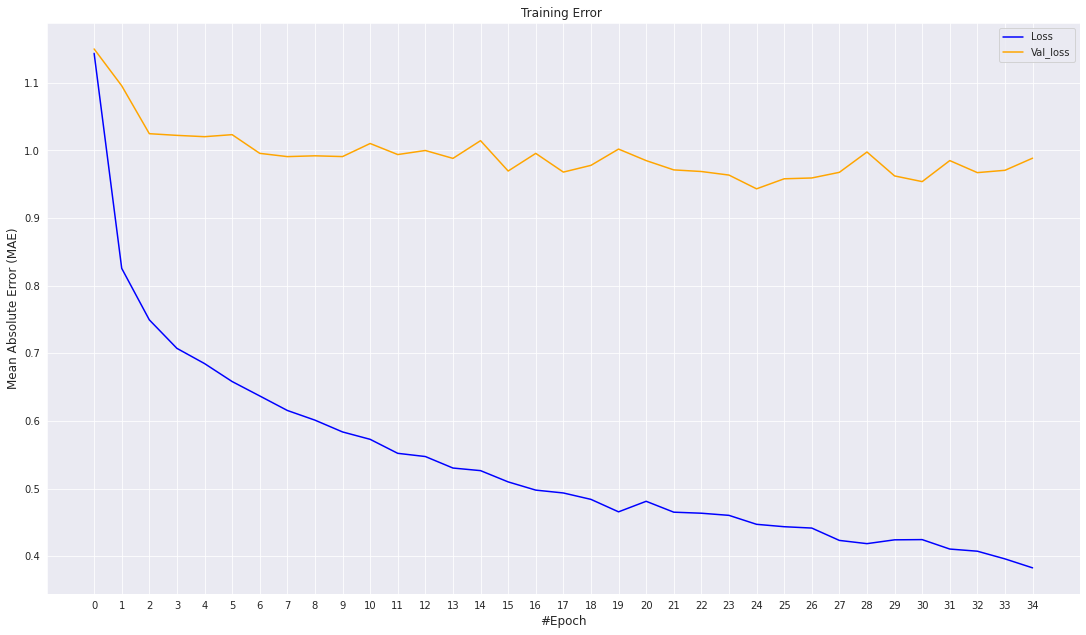

In [113]:
plot_loss_and_val_loss(hist)

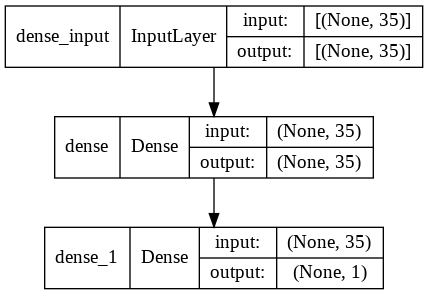

In [114]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [115]:
model = seq()
model.add(Dense(35, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))
model.compile(loss='mae', optimizer='adam')

In [116]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                        epochs=epochs, batch_size=batch_size, verbose=0, shuffle = True, callbacks = [es])

Restoring model weights from the end of the best epoch: 16.
Epoch 00026: early stopping


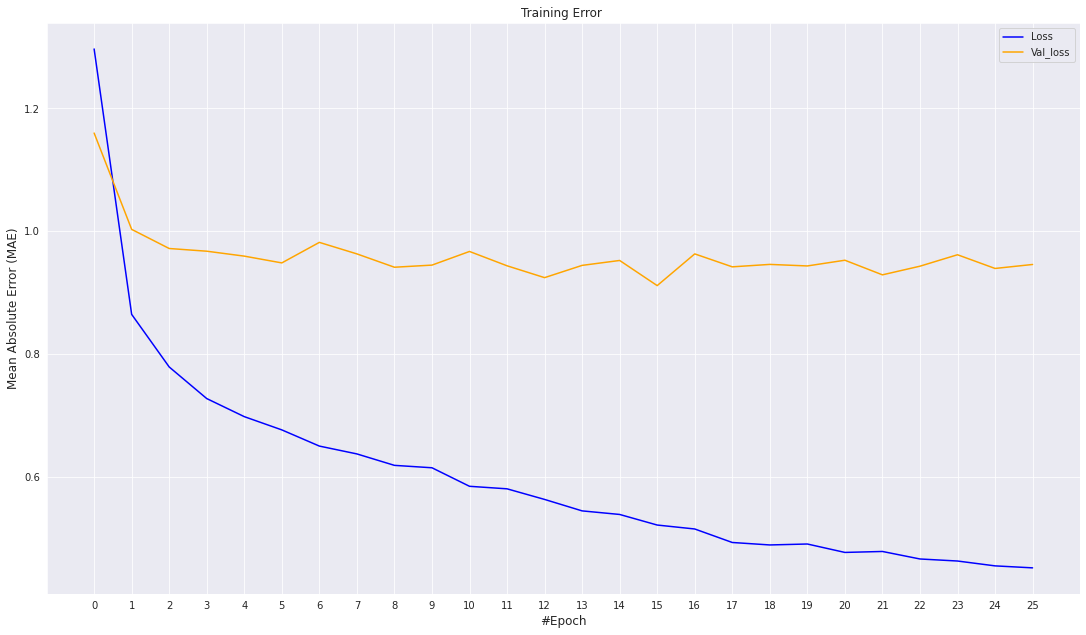

In [117]:
plot_loss_and_val_loss(hist)

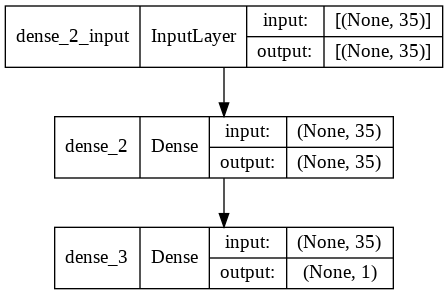

In [118]:
tf.keras.utils.plot_model(model, show_shapes=True)

### Two denses model experiments

In [119]:
model = seq()
model.add(Dense(35, activation = 'relu'))
model.add(Dense(18, activation = 'relu'))
model.add(Dense(1, activation = 'relu'))
model.compile(loss='mae', optimizer='adam')

In [120]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                        epochs=epochs, batch_size=batch_size, verbose=0, shuffle = True, callbacks = [es])

Restoring model weights from the end of the best epoch: 10.
Epoch 00020: early stopping


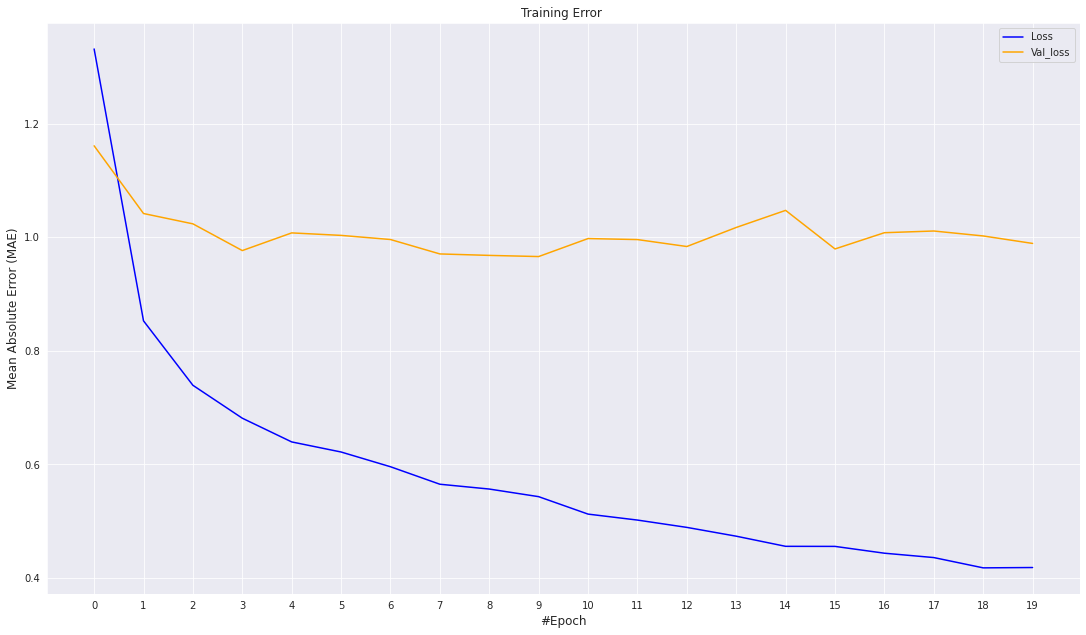

In [121]:
plot_loss_and_val_loss(hist)

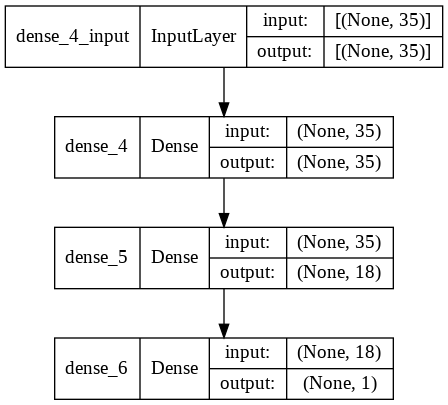

In [122]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [123]:
model = seq()
model.add(Dense(35, activation = 'relu'))
model.add(Dense(18, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))
model.compile(loss='mae', optimizer='adam')

In [124]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                        epochs=epochs, batch_size=batch_size, verbose=0, shuffle = True, callbacks = [es])

Restoring model weights from the end of the best epoch: 22.
Epoch 00032: early stopping


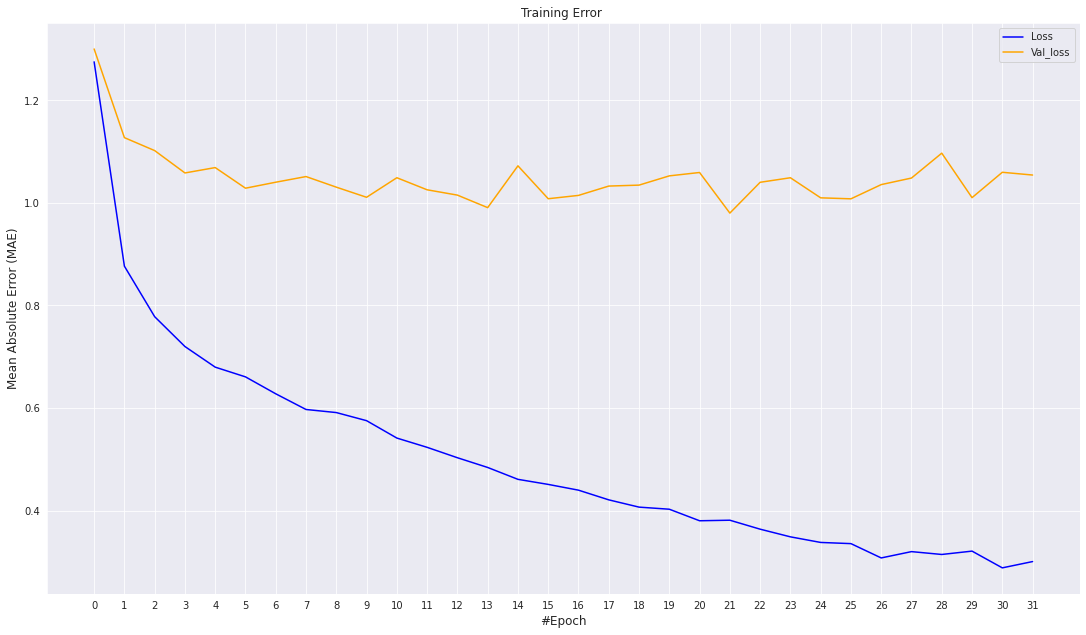

In [125]:
plot_loss_and_val_loss(hist)

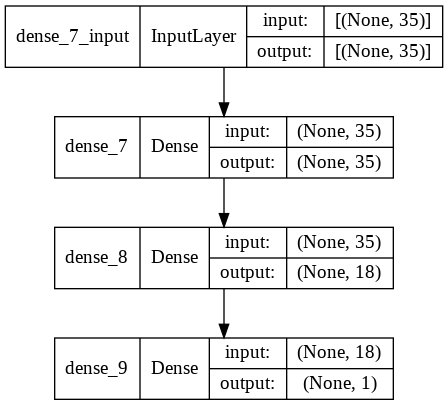

In [126]:
tf.keras.utils.plot_model(model, show_shapes=True)

### Three denses model experiments

In [127]:
model = seq()
model.add(Dense(35, activation = 'relu'))
model.add(Dense(18, activation = 'relu'))
model.add(Dense(9, activation = 'relu'))
model.add(Dense(1, activation = 'relu'))
model.compile(loss='mae', optimizer='adam')

In [128]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                        epochs=epochs, batch_size=batch_size, verbose=0, shuffle = True, callbacks = [es])

Restoring model weights from the end of the best epoch: 8.
Epoch 00018: early stopping


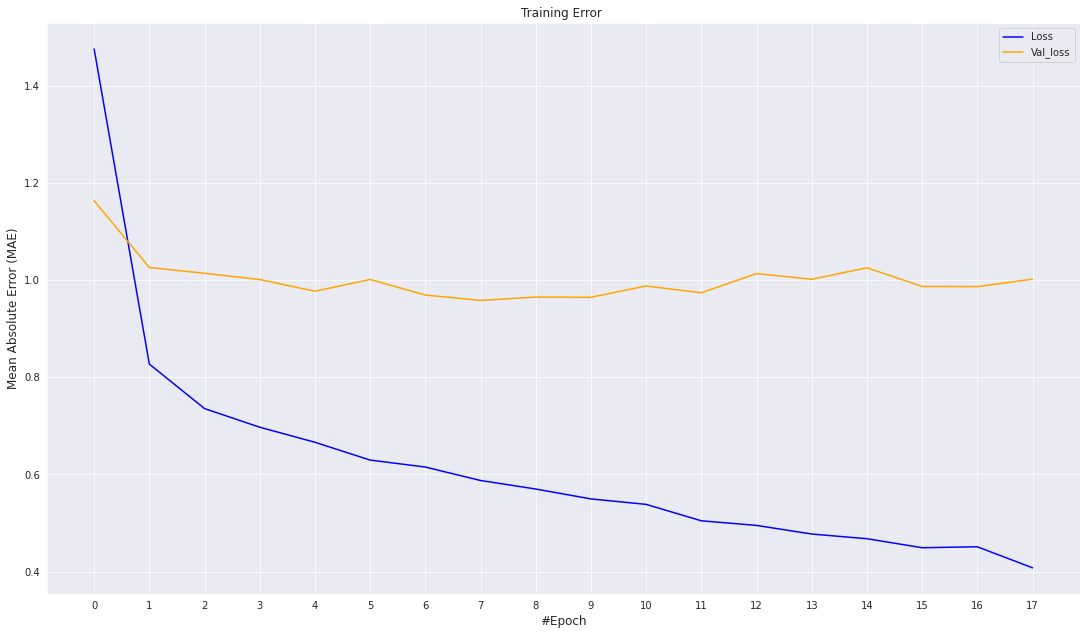

In [129]:
plot_loss_and_val_loss(hist)

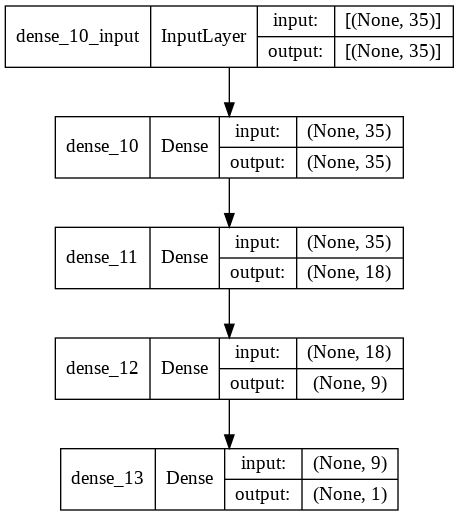

In [130]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [131]:
model = seq()
model.add(Dense(35, activation = 'relu'))
model.add(Dense(18, activation = 'relu'))
model.add(Dense(9, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))
model.compile(loss='mae', optimizer='adam')

In [132]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                        epochs=epochs, batch_size=batch_size, verbose=0, shuffle = True, callbacks = [es])

Restoring model weights from the end of the best epoch: 13.
Epoch 00023: early stopping


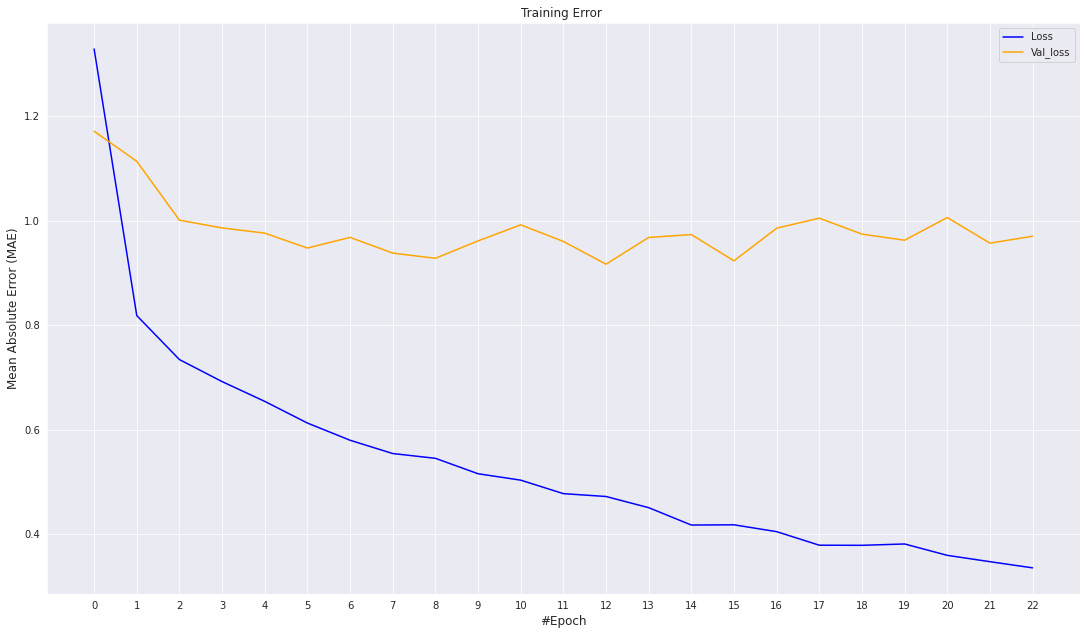

In [133]:
plot_loss_and_val_loss(hist)

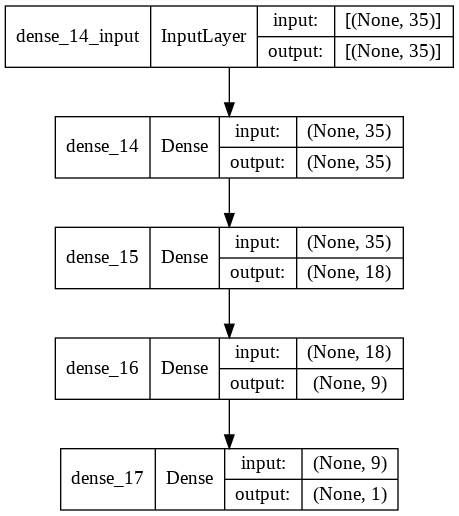

In [134]:
tf.keras.utils.plot_model(model, show_shapes=True)

### Four denses model experiments

In [135]:
model = seq()
model.add(Dense(35, activation = 'relu'))
model.add(Dense(18, activation = 'relu'))
model.add(Dense(9, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(1, activation = 'relu'))
model.compile(loss='mae', optimizer='adam')

In [136]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                        epochs=epochs, batch_size=batch_size, verbose=0, shuffle = True, callbacks = [es])

Restoring model weights from the end of the best epoch: 5.
Epoch 00015: early stopping


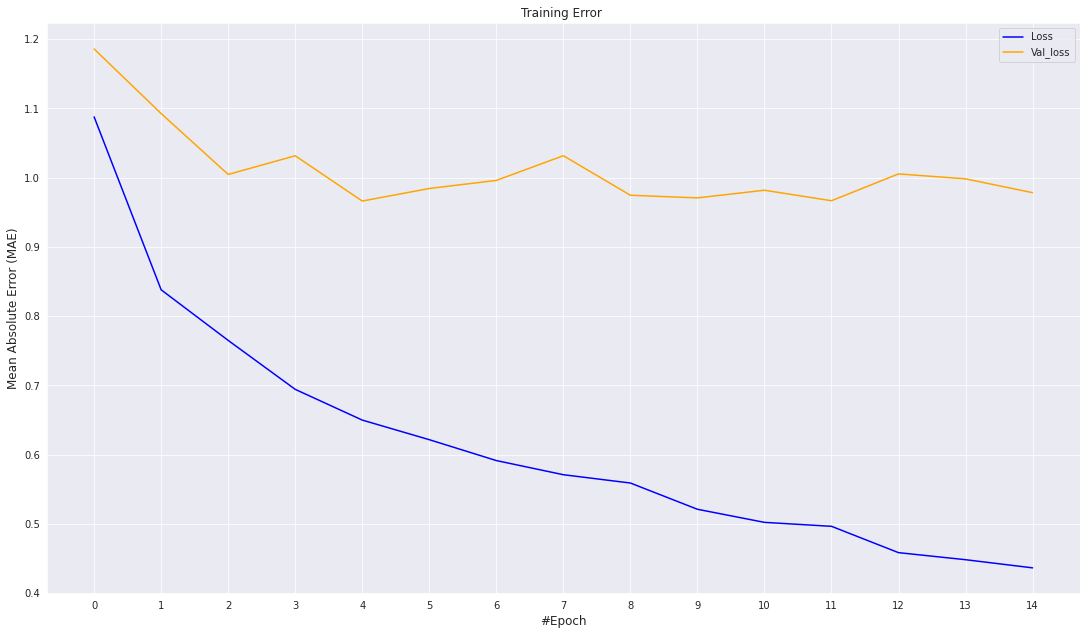

In [137]:
plot_loss_and_val_loss(hist)

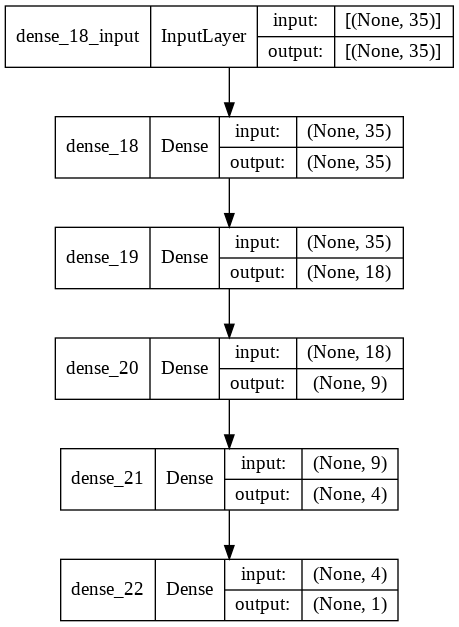

In [138]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [139]:
model = seq()
model.add(Dense(35, activation = 'relu'))
model.add(Dense(18, activation = 'relu'))
model.add(Dense(9, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))
model.compile(loss='mae', optimizer='adam')

In [140]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                        epochs=epochs, batch_size=batch_size, verbose=0, shuffle = True, callbacks = [es])

Restoring model weights from the end of the best epoch: 16.
Epoch 00026: early stopping


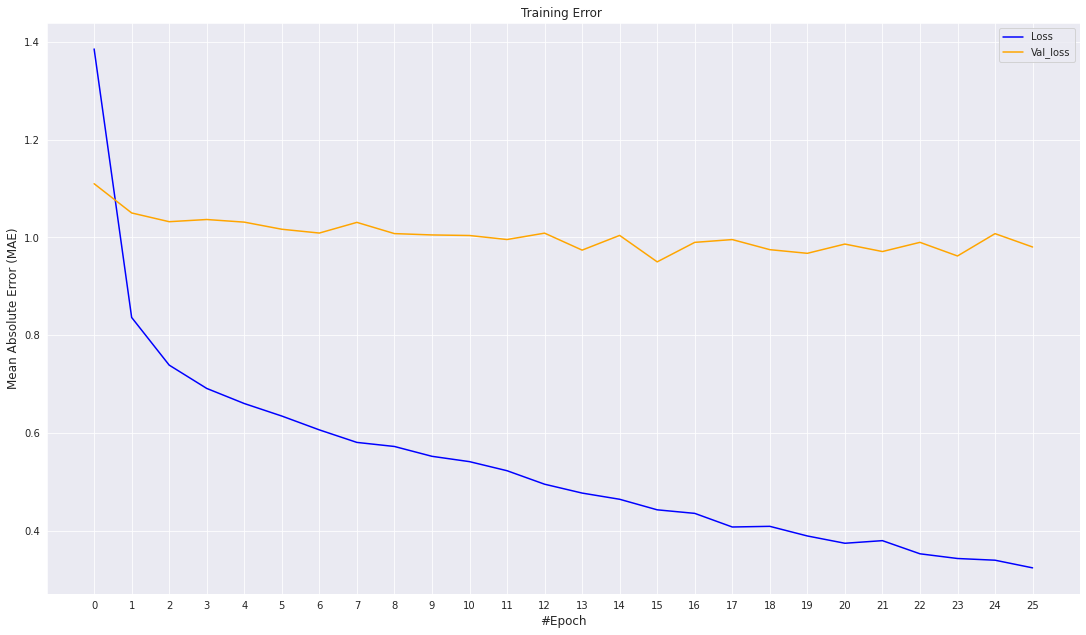

In [141]:
plot_loss_and_val_loss(hist)

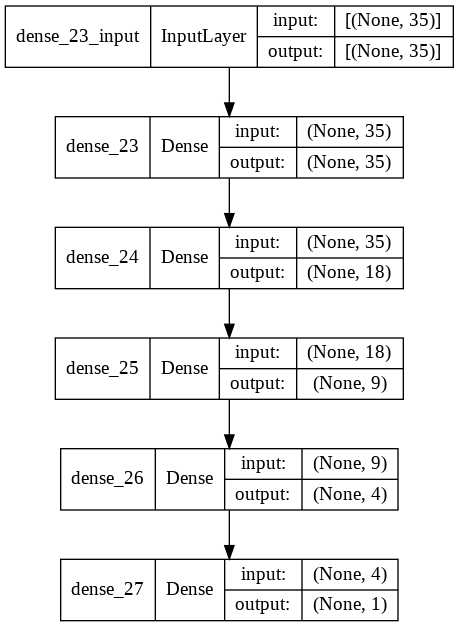

In [142]:
tf.keras.utils.plot_model(model, show_shapes=True)